## Данные

Данные связаны с прямыми маркетинговыми кампаниями португальского банковского учреждения. Маркетинговые кампании были основаны на телефонных звонках. Часто требовалось более одного контакта с одним и тем же клиентом, чтобы он приобрел продукт т.е. (банковский срочный депозит) подписан ("да") или нет ("нет").

Цель классификации состоит в том, чтобы предсказать, подпишется ли клиент (да/нет) на срочный депозит (переменная y).

Информация о признаках: <br>
<br>
Входные переменные:<br>
данные клиента банка:<br>
1 - age (числовой)<br>
2 - job :  тип работы (категориальный: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown")<br>
3 - marital : семейное положение (категориальное: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)<br>
4 - education (категориальное: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')<br>
5 - default: есть ли дефолт по кредиту? (категориально: "нет", "да", "неизвестно")<br>
6 - housing: есть ли жилищный кредит? (категориально: "нет", "да", "неизвестно")<br>
7 - loan: есть личный заем? (категориально: "нет", "да", "неизвестно")<br>
<br>
Связано с последним контактом в текущей кампании:<br>
8 - contact: тип контактной связи (категориальный: 'cellular','telephone')<br>
9 - month: месяц последнего контакта в году (категория: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br>
10 - day_of_week: последний контактный день недели (категориальный: 'mon','tue','wed','thu','fri')<br>
11 - duration:  продолжительность последнего контакта в секундах (числовая). Важное примечание: этот атрибут сильно влияет на конечный результат (например, если duration=0, то y='no'). Тем не менее, продолжительность не известна до выполнения вызова. Кроме того, после окончания вызова y, очевидно, известен. Таким образом, эти входные данные следует включать только для целей сравнения и отбрасывать, если предполагается получить реалистичную прогностическую модель.<br>
<br>
Другие атрибуты<br>
12 - campaign: количество контактов, выполненных в ходе этой кампании и для данного клиента (числовое, включая последний контакт)<br>
13 - pdays: количество дней, прошедших с момента последнего контакта с клиентом из предыдущей кампании (числовое значение; 999 означает, что с клиентом ранее не связывались)<br>
14 - previous:  количество контактов, выполненных до этой кампании и для этого клиента (числовое значение)<br>
15 - poutcome: результат предыдущей маркетинговой кампании (категорический: 'failure','nonexistent','success')<br>
<br>
Выходная переменная (желаемая цель):<br>
16 - y: оформил ли клиент срочный депозит? (двоичный код: "да", "нет")

## Импортируем нужные библиотеки

In [1]:
import pandas as pd
import numpy as np
import requests, zipfile, io 
import matplotlib.pyplot as plt  
import seaborn as sns 

In [2]:
plt.style.use('tableau-colorblind10')

## Данные

In [3]:
r = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip')
z = zipfile.ZipFile(io.BytesIO(r.content))

Просматриваем архив и выбираем нужный файл

In [4]:
z.namelist()

['bank-full.csv', 'bank-names.txt', 'bank.csv']

Считываем датасет

In [5]:
df = pd.read_csv(z.open('bank-full.csv'), sep=';')
df.head(5)

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [6]:
df["y"].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

Видно, что классы у таргета несбалансированы

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
df["month"] = pd.to_datetime(df.month, format = "%b").dt.month

## 2.EDA

### 2.1 Рассмотрим числовые признаки

In [9]:
df_num = df.select_dtypes(include=['int64'])

In [10]:
num_col=[]
for col in df_num.columns:
    num_col.append(col)

In [11]:
num_col

['age', 'balance', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous']

#### Рассмотрим расспределение числовых признаков

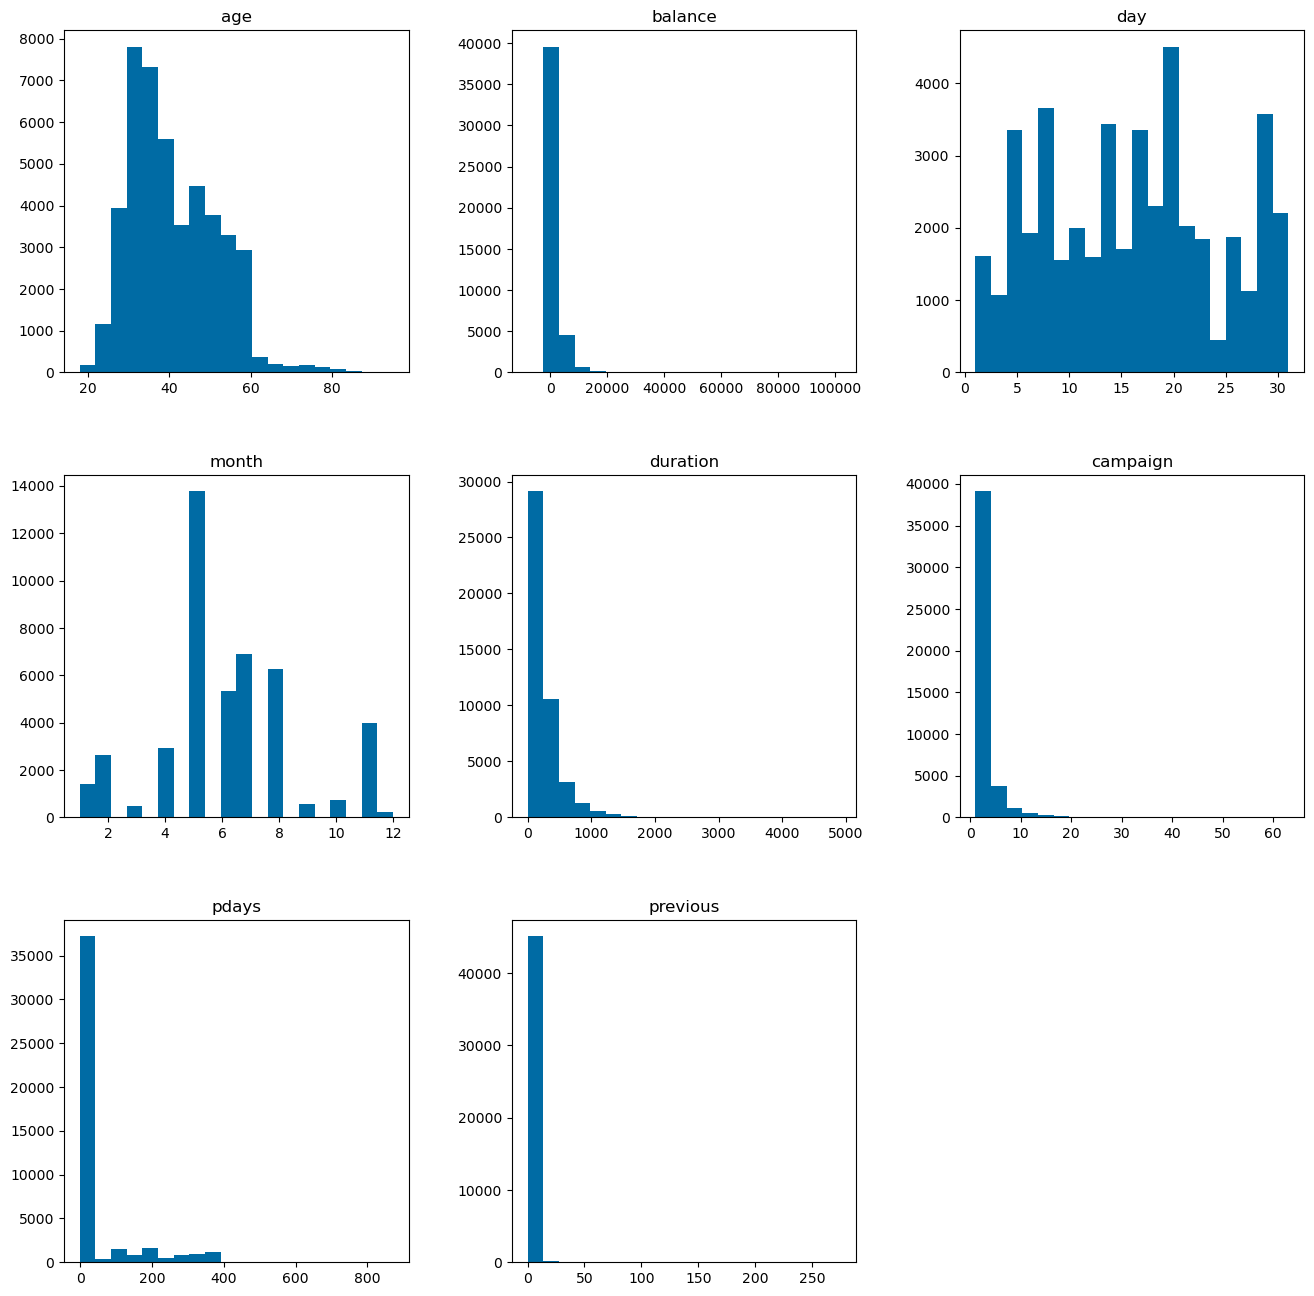

In [12]:
df_num.hist(figsize=(16, 16), bins=20, grid=False);

Признаки balance, duration, pdays, previous, compaign могут иметь выбросы

#### Поссмотрим на выбросы используя boxplot

- balance. Люди могут иметь различный баланс, поэтому скорее всего, это не выбросы

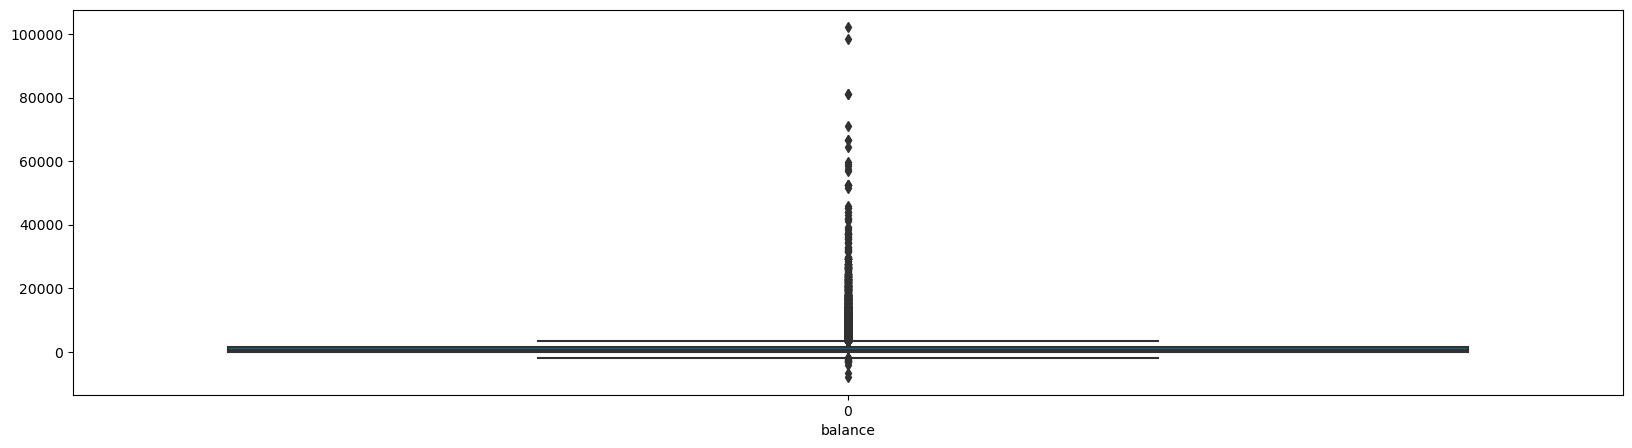

In [13]:
plt.figure(figsize=(20, 5))

sns.boxplot(df['balance'], whis=1.5)

plt.xlabel('balance')
plt.show()

 - Duration - Продолжительность последнего контакта. Скорее всего данная информация является важной, и не явkялется выбросами

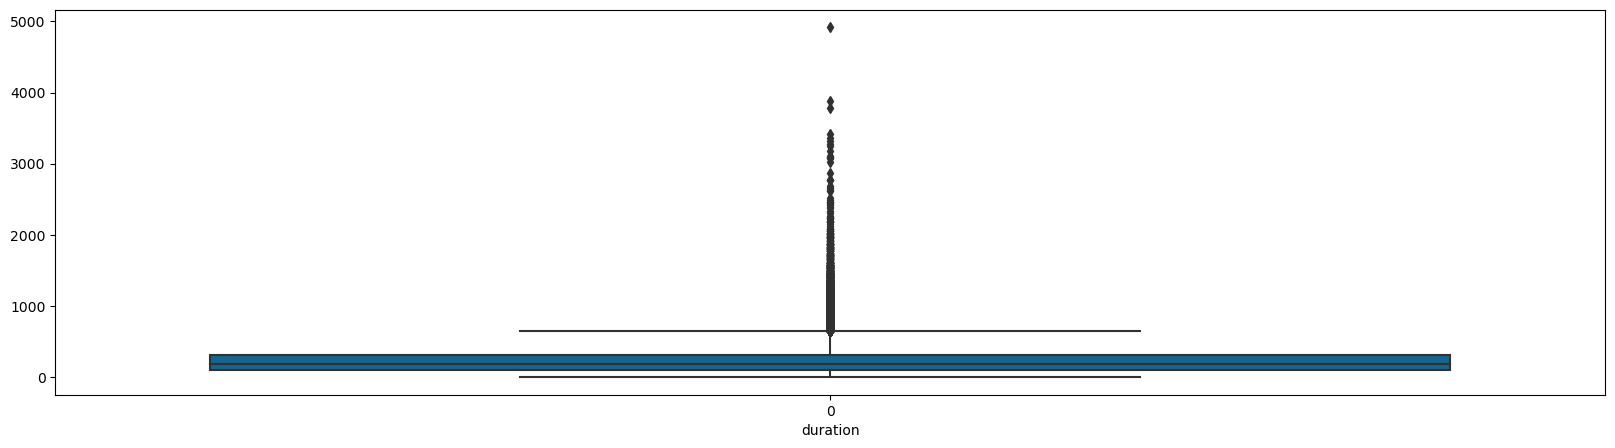

In [14]:
plt.figure(figsize=(20, 5))

sns.boxplot(df['duration'], whis=1.5)

plt.xlabel('duration')
plt.show()

 - pdays - Количество дней, прошедших с момента последнего контакта с клиентом из предыдущей кампании (числовое значение; 999 означает, что с клиентом ранее не связывались). Поэтому данные значения скорее всего также не являются выбросами

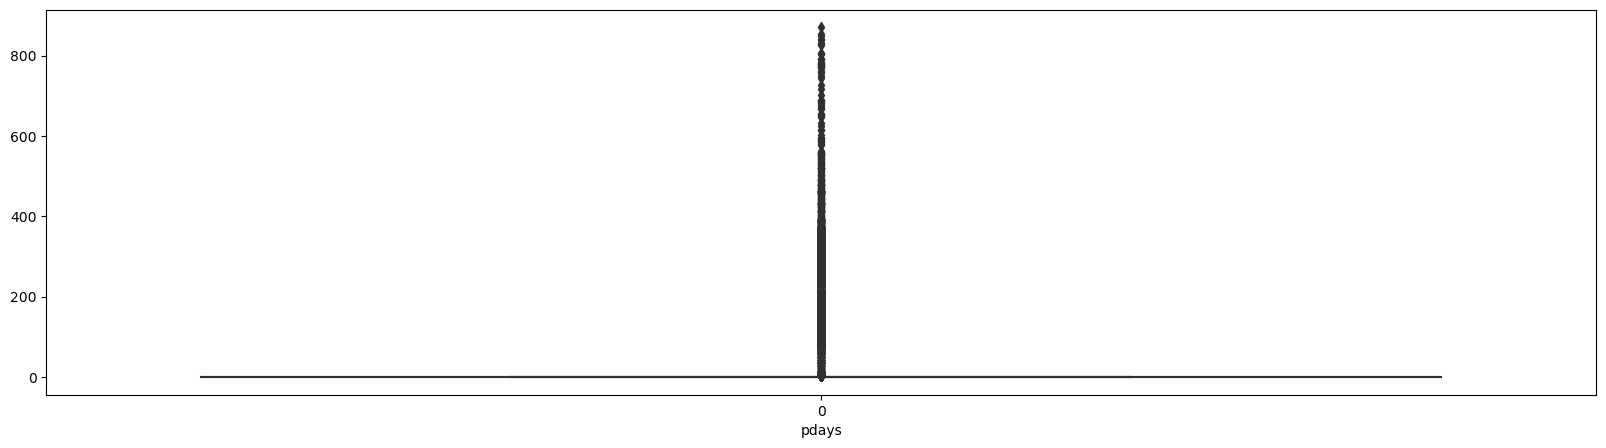

In [15]:
plt.figure(figsize=(20, 5))

sns.boxplot(df['pdays'], whis=1.5)

plt.xlabel('pdays')
plt.show()

- Возраст

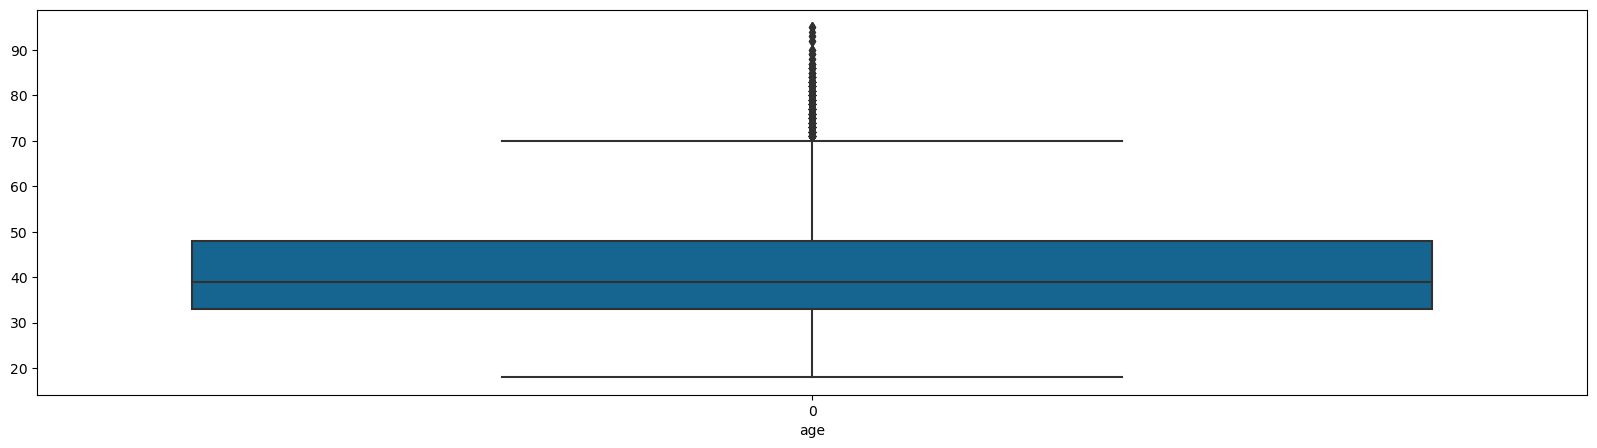

In [16]:
plt.figure(figsize=(20, 5))

sns.boxplot(df['age'], whis=1.5)

plt.xlabel('age')
plt.show()

In [17]:
df = df.loc[df['age'] < 90]

Данные соответсвующие клиентам возраста более 90 лет скорее всего являются выбросами, поскольку в таком возрасте вряд ли человек будет брать депозит

 - previous - количество контактов, выполненных до этой кампании и для этого клиента

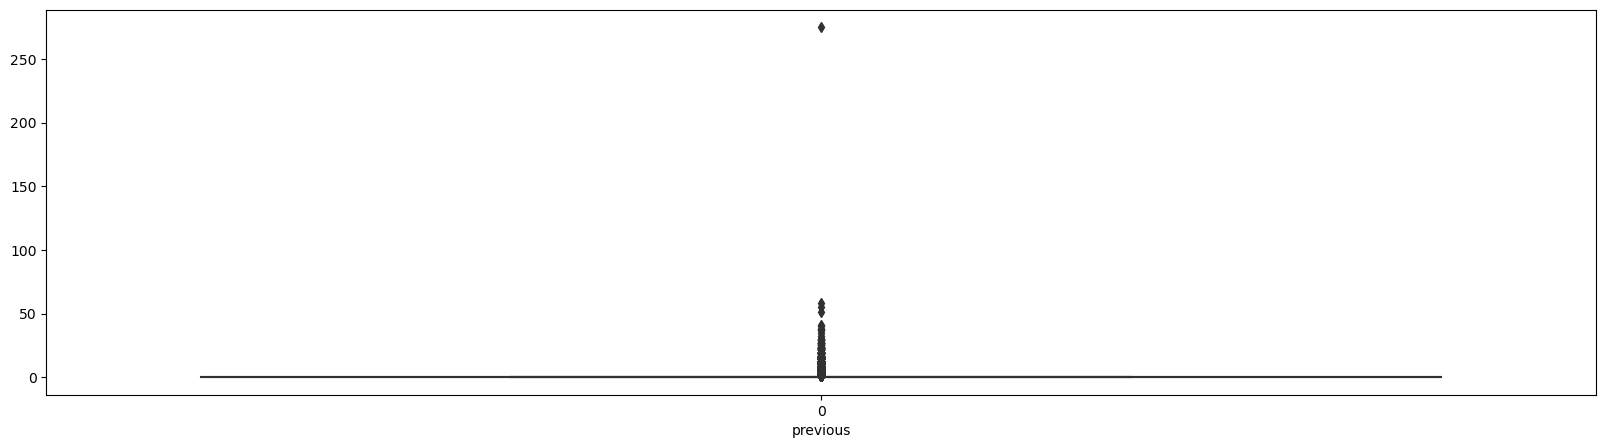

In [18]:
plt.figure(figsize=(20, 5))

sns.boxplot(df['previous'], whis=1.5)

plt.xlabel('previous')
plt.show()

По графику видно выброс, соответстующий значению 300, отсечем его

In [19]:
df = df.loc[df['previous'] < 250]

### Проведем более детальный анализ данных

In [20]:
df.head(3)

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   

   contact  day  month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5      5       261         1     -1         0  unknown  no  
1  unknown    5      5       151         1     -1         0  unknown  no  
2  unknown    5      5        76         1     -1         0  unknown  no

#### Рассмотрим динамику охвата рекламных компаний по месяцам

In [21]:
data = df.groupby('month')['job'].agg(count='count').reset_index().sort_values(by='month')

In [22]:
data.head()

month  count
0      1   1402
1      2   2647
2      3    475
3      4   2931
4      5  13766

 - Создаем линейный график

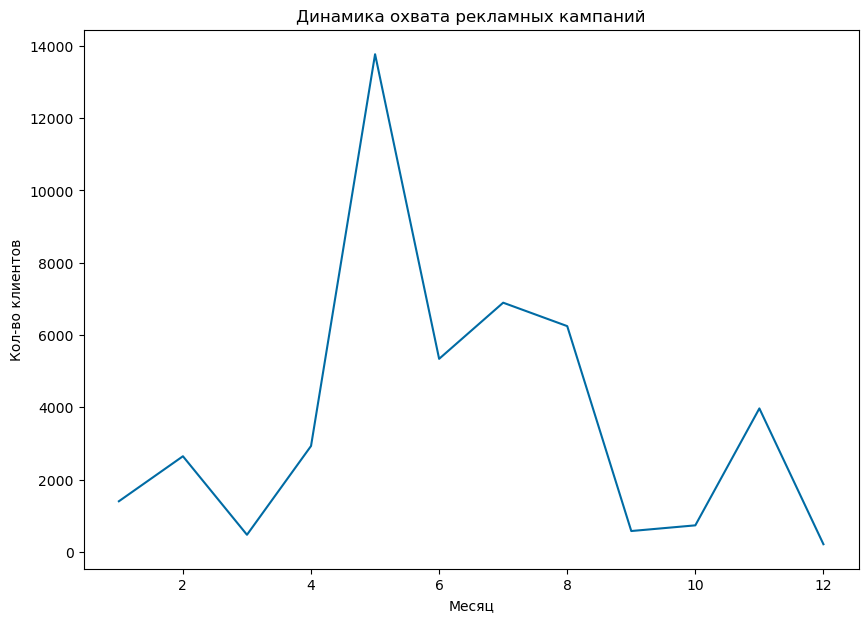

In [23]:
plt.figure(figsize=(10, 7))

plt.plot(data['month'], data['count'])

plt.title('Динамика охвата рекламных кампаний')
plt.xlabel('Месяц')
plt.ylabel('Кол-во клиентов')

plt.show()

Видно, что максимум клиентов приходится на май, значит, реклама, которая была проведена в мае привлекла большое число людей

#### Рассмотрим, как на динамику охвата влияет то, женат/замужем человек или нет

In [24]:
data1 = df[df['marital'] == 'single'].groupby('month')['job'].agg(count='count').reset_index().sort_values(by='month')
data2 = df[df['marital'] == 'married'].groupby('month')['job'].agg(count='count').reset_index().sort_values(by='month')

Строим два линейных графика с отфильтрованными данными

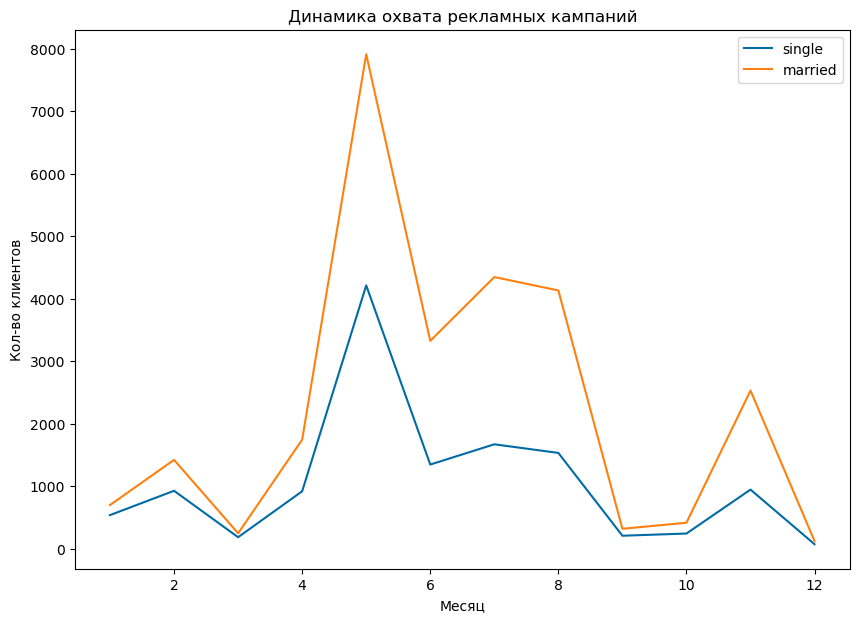

In [25]:
plt.figure(figsize=(10, 7))

plt.plot(data1['month'], data1['count'])
plt.plot(data2['month'], data2['count'])

plt.title('Динамика охвата рекламных кампаний')
plt.xlabel('Месяц')
plt.ylabel('Кол-во клиентов')
plt.legend(['single', 'married'])

plt.show()

Наблюдается одинаковая тенденция, с большим охватом в мае и летом. Однако, видно, что охват для женатых людей по всем месяцам выше, в особенности летом, чем для холостых. Что в свою очередь может быть связанно с тем, что люди у которых есть семья, чаще берут кредит на семейные нужды.

#### Строим гистограмму в разрезе возраста клиентов

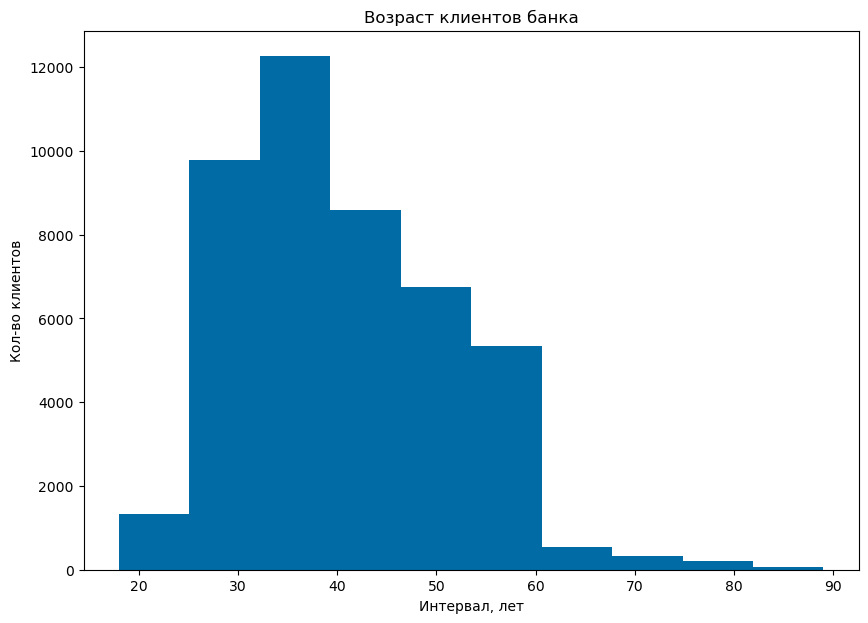

In [26]:
plt.figure(figsize=(10, 7))

plt.hist(df['age'], bins=10)

plt.title('Возраст клиентов банка')
plt.xlabel('Интервал, лет')
plt.ylabel('Кол-во клиентов')

plt.show()

Видно, что молодых людей мало, по сравнению со взрослыми. Преобладают люди среднего возраста. Возрастных людей также очень мало

### Рассмотрим связь таргета с другими признаками

#### Строим гистограмму в разрезе людей, взявших и не взявших депозит 

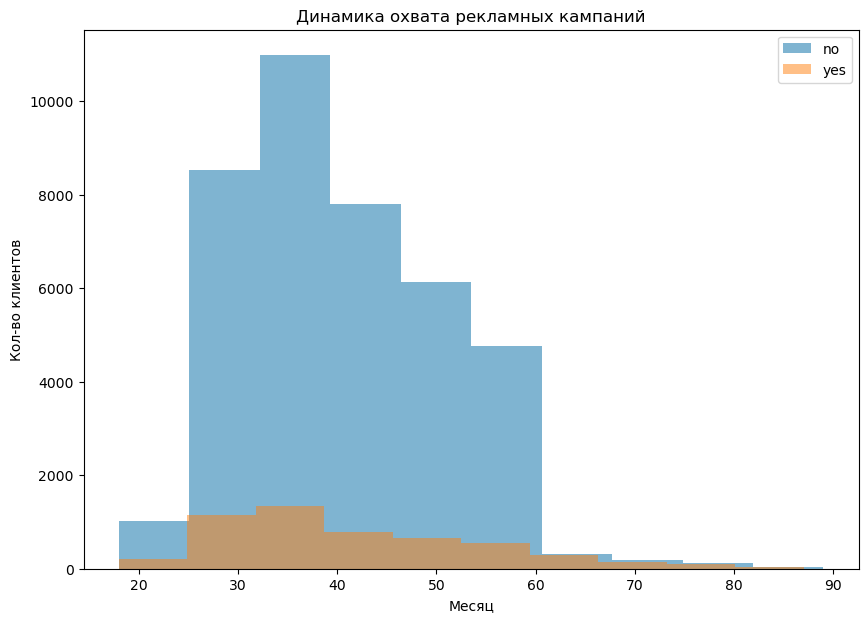

In [27]:
plt.figure(figsize=(10, 7))

plt.hist(df['age'][df['y'] == 'no'], alpha=0.5, label='no')
plt.hist(df['age'][df['y'] == 'yes'], alpha=0.5, label='yes')


plt.title('Динамика охвата рекламных кампаний')
plt.xlabel('Месяц')
plt.ylabel('Кол-во клиентов')
plt.legend()

plt.show()

Распределение по возрастам, тех кто взял депозит и не взял - схоже. Из графика видно, что большинство людей не берут депозит, а чаще берут 30 - 40 летние люди.  

#### Рассмотрим связь длительности звонка и того, взял человек депозит или нет

In [28]:
# Готовим данные для графика
data1 = df['duration'][df['y'] == 'yes']
data2 = df['duration'][df['y'] == 'no']
data1.head()

83     1042
86     1467
87     1389
129     579
168     673
Name: duration, dtype: int64

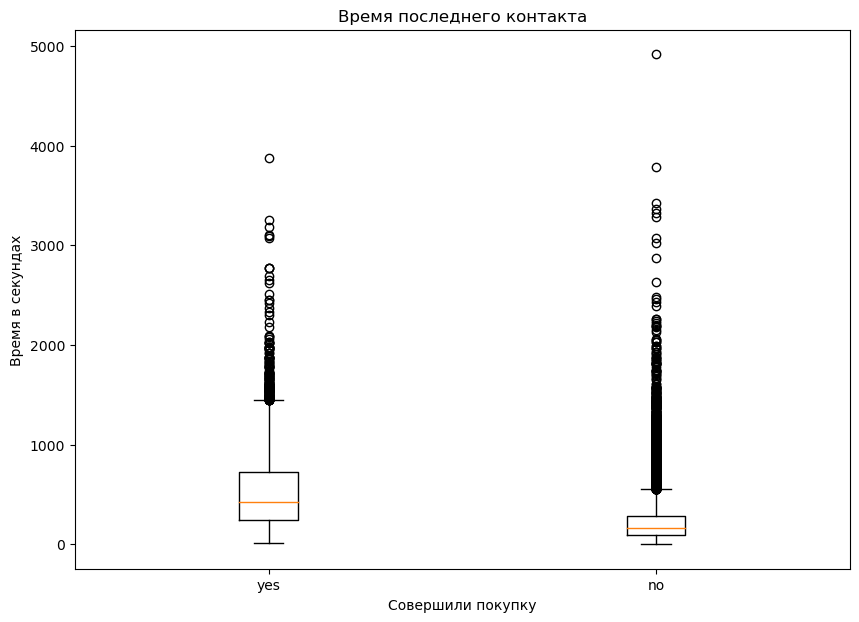

In [29]:
# Строим боксплот

plt.figure(figsize=(10, 7))

plt.boxplot([data1, data2])

plt.title('Время последнего контакта')
plt.xlabel('Совершили покупку')
plt.ylabel('Время в секундах')
plt.xticks([1, 2], ['yes', 'no'])

plt.show()

Строим боксплот без выбросов 

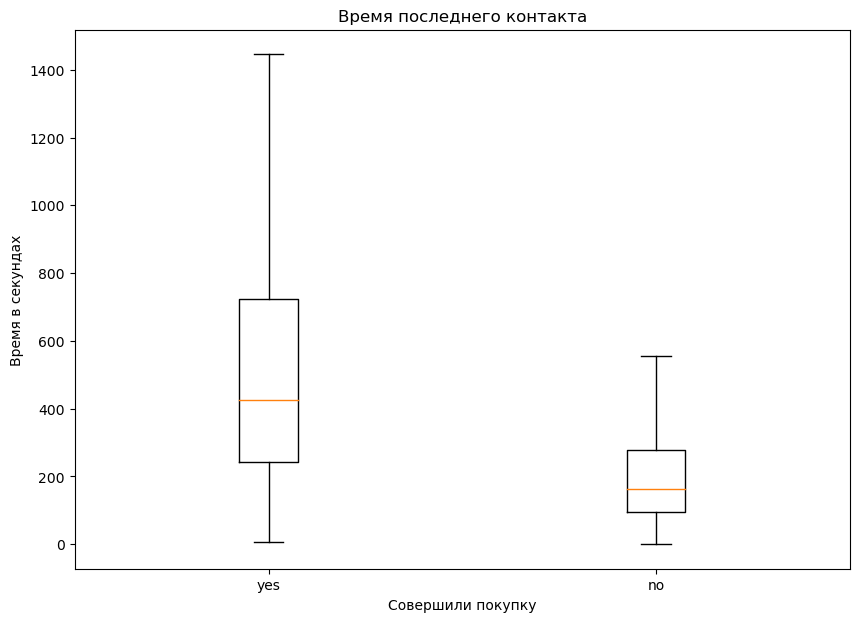

In [30]:
plt.figure(figsize=(10, 7))

plt.boxplot([data1, data2], showfliers=False)

plt.title('Время последнего контакта')
plt.xlabel('Совершили покупку')

plt.ylabel('Время в секундах')
plt.xticks([1, 2], ['yes', 'no'])

plt.show()

Люди, которые дольше общались с колцентром чаще совершают покупку. Медианное значение времени отличается примерно в 2 раза.

#### Рассмотрим зависимость рода деятельности клиентов от того, приобрели они депозит или нет

In [31]:
data = pd.crosstab(df['job'], df['y'], normalize='index').reset_index().sort_values(by='no', ascending=False)
data.head()

y           job        no       yes
1   blue-collar  0.927250  0.072750
2  entrepreneur  0.917283  0.082717
3     housemaid  0.912097  0.087903
7      services  0.911170  0.088830
9    technician  0.889430  0.110570

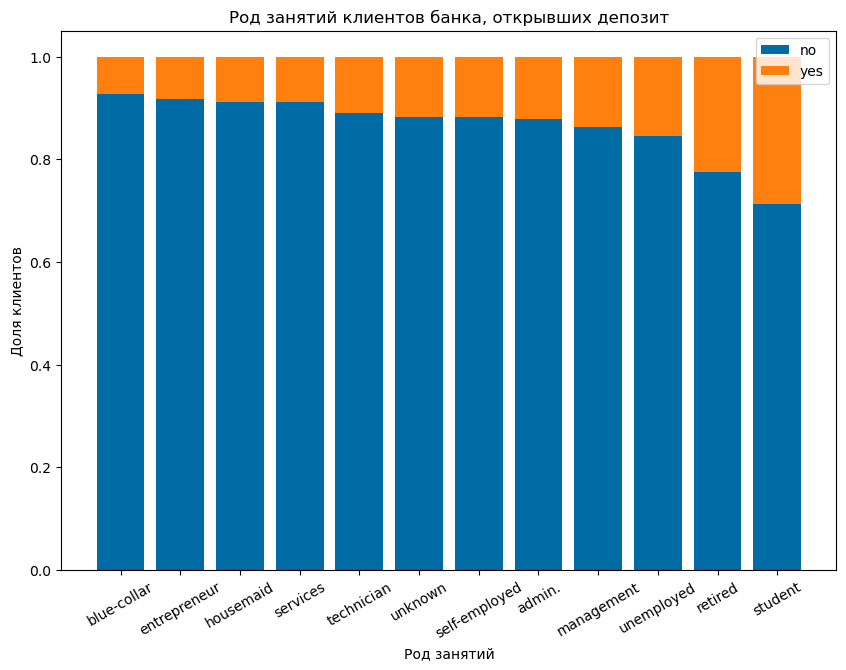

In [32]:
# Строим столбчатую многорядную сложенную диаграмму
plt.figure(figsize=(10, 7))

plt.bar(data['job'], data['no'])
plt.bar(data['job'], data['yes'], bottom=data['no'])

plt.title('Род занятий клиентов банка, открывших депозит')
plt.xlabel('Род занятий')
plt.ylabel('Доля клиентов')
plt.legend(['no', 'yes'])
plt.xticks(rotation = 30)

plt.show()

На этой диаграмме видно процентное соотношение того, взяли депозит или нет. Видно, что чаще депозит берут студенты и люди на пенсии.

#### Визуализируем распределение таргета на круговой диаграмме 

In [33]:
# Готовим данные для графика
data = df['y'].value_counts()
data.head()

no     39919
yes     5282
Name: y, dtype: int64

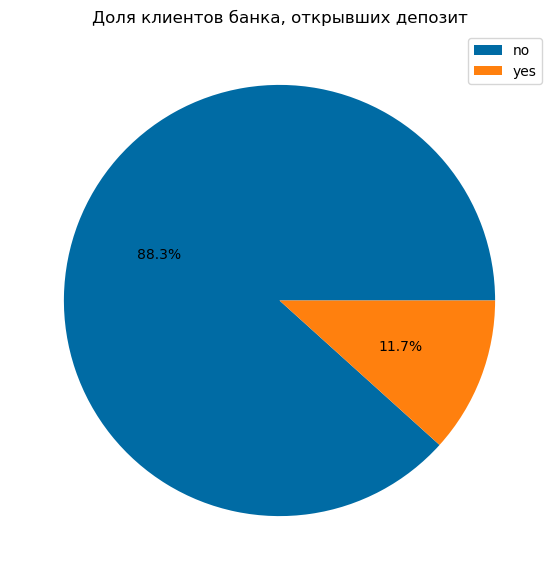

In [34]:
# Строим круговую диаграмму

plt.figure(figsize=(10, 7))

plt.pie(data, autopct='%1.1f%%')

plt.title('Доля клиентов банка, открывших депозит')
plt.legend(data.index)

plt.show()

### Построим матрицу корреляции с учетом числовых признаков

In [35]:
df['y'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

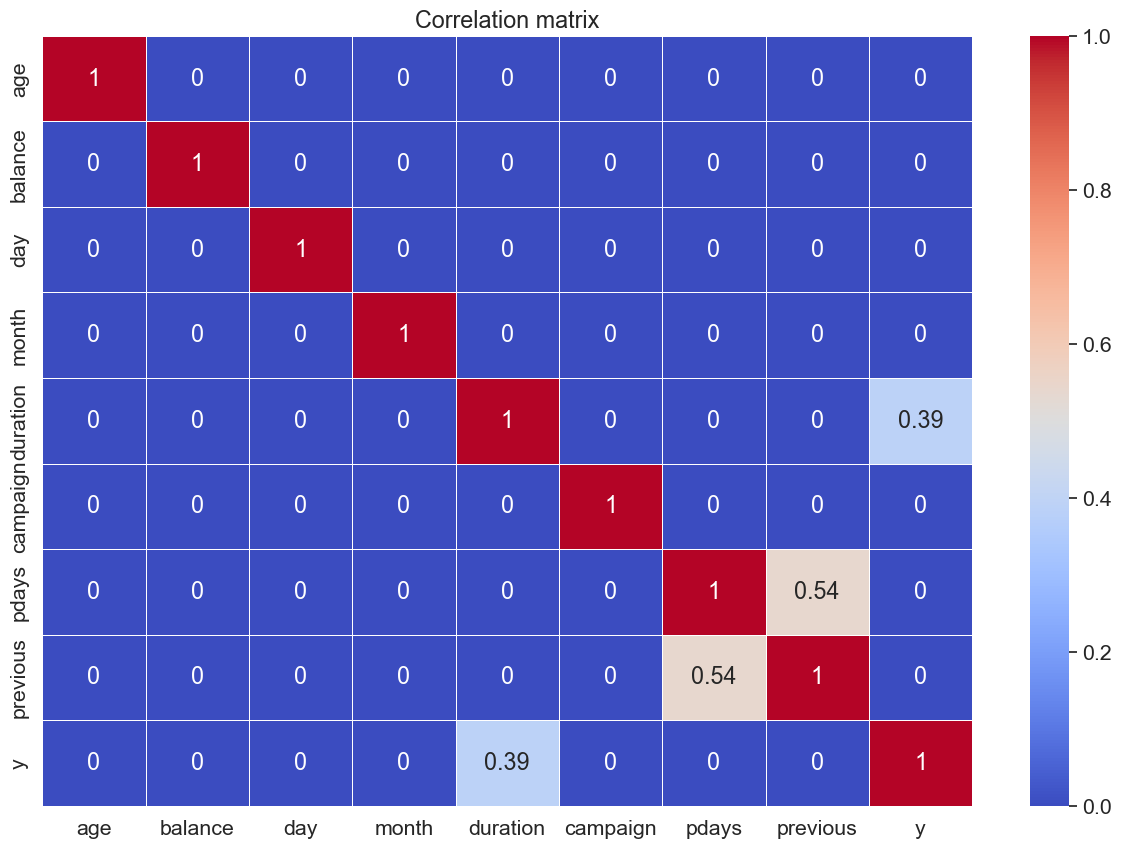

In [36]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.4)

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

Таргет хорошо коррелирует с duration - продолжительностью звонка. Также видна сильная корреляция между признаками pdays и previous, оба связанны с контактами с клиентом.

 ### 3. Обработка данных 

In [37]:
df

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day  month  duration  campaign  pdays  previous poutcome  y  
0        unknown    5      5       261         1     -1         0  unknown  0  
1        unknown    5      5       151         1     -1         0  unknown  0  
2        unknown    5      5        76         1     -1         0  unknown  0  
3        unknown    5      5        92         1     -1         0  unknown  0  
4        unknown    5      5       198         1     -1         0  unknown  0  
...          ...  ...    ...       ...       ...    ...       ...      ... ..  
45206   cellular   17     11       977         3     -1         0  unknown  1  
45207   cellular   17     11       456         2     -1         0  unknown  1  
45208   cellular   17     11      1127         5    184         3  success  1  
45209  telephone   17     11       508         4     -1         0  unknown  0  
45210   cellular   17     11       361         2    188        11    other  0  

[45201 rows x 17 columns]

In [38]:
df_cat = df.select_dtypes(include=['object'])

In [39]:
df_cat.describe()

job  marital  education default housing   loan   contact  \
count         45201    45201      45201   45201   45201  45201     45201   
unique           12        3          4       2       2      2         3   
top     blue-collar  married  secondary      no     yes     no  cellular   
freq           9732    27208      23199   44386   25129  37957     29278   

       poutcome  
count     45201  
unique        4  
top     unknown  
freq      36953

Признаки: default, housing, loan - бинарные

In [40]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [41]:
df["default"]= le.fit_transform(df["default"]) 

In [42]:
df["housing"]= le.fit_transform(df["housing"]) 

In [43]:
df["loan"]= le.fit_transform(df["loan"])

### Посмотрим на матрицу корреляции с учетом этих признаков

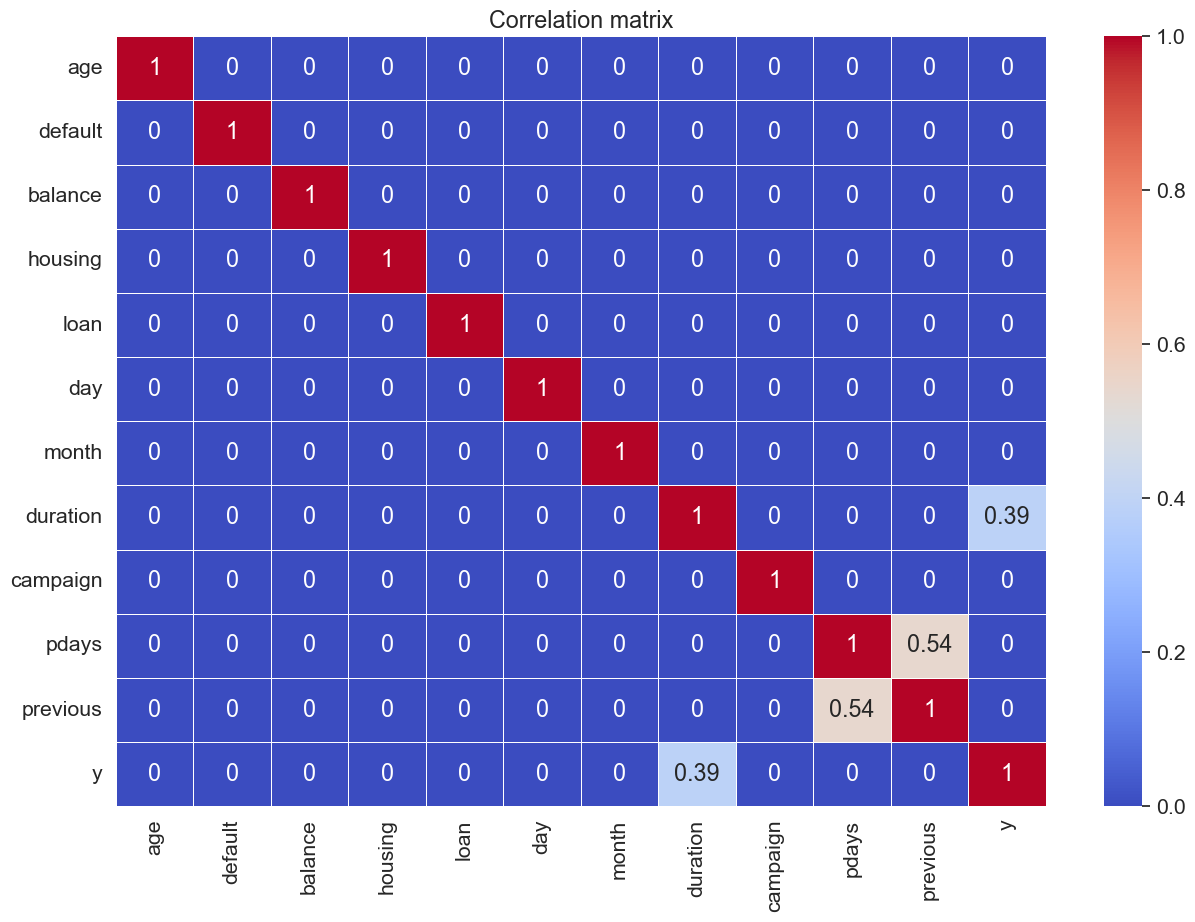

In [44]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.4)

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

Видно, что они также слабо связаны с таргетом. Duration коррелирует с таргетом

#### Применим MinMaxScaler к числовым признакам

In [48]:
from sklearn.preprocessing import MinMaxScaler

In [49]:
num_col

['age', 'balance', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous']

In [50]:
def get_scale(df,col, model):
    
    scal = model.fit_transform(df[col])
    df[col] = scal
    return df

In [51]:
df = get_scale(df, num_col, MinMaxScaler())

In [52]:
df.head(5)

age           job  marital  education  default   balance  housing  \
0  0.563380    management  married   tertiary        0  0.092259        1   
1  0.366197    technician   single  secondary        0  0.073067        1   
2  0.211268  entrepreneur  married  secondary        0  0.072822        1   
3  0.408451   blue-collar  married    unknown        0  0.086476        1   
4  0.211268       unknown   single    unknown        0  0.072812        0   

   loan  contact       day     month  duration  campaign  pdays  previous  \
0     0  unknown  0.133333  0.363636  0.053070       0.0    0.0       0.0   
1     0  unknown  0.133333  0.363636  0.030704       0.0    0.0       0.0   
2     1  unknown  0.133333  0.363636  0.015453       0.0    0.0       0.0   
3     0  unknown  0.133333  0.363636  0.018707       0.0    0.0       0.0   
4     0  unknown  0.133333  0.363636  0.040260       0.0    0.0       0.0   

  poutcome  y  
0  unknown  0  
1  unknown  0  
2  unknown  0  
3  unknown  0  
4  unknown  0

In [53]:
y = df["y"]

In [54]:
df.drop(columns=["y"], axis=1, inplace=True)

In [55]:
df

age           job   marital  education  default   balance  \
0      0.563380    management   married   tertiary        0  0.092259   
1      0.366197    technician    single  secondary        0  0.073067   
2      0.211268  entrepreneur   married  secondary        0  0.072822   
3      0.408451   blue-collar   married    unknown        0  0.086476   
4      0.211268       unknown    single    unknown        0  0.072812   
...         ...           ...       ...        ...      ...       ...   
45206  0.464789    technician   married   tertiary        0  0.080293   
45207  0.746479       retired  divorced    primary        0  0.088501   
45208  0.760563       retired   married  secondary        0  0.124689   
45209  0.549296   blue-collar   married  secondary        0  0.078868   
45210  0.267606  entrepreneur   married  secondary        0  0.099777   

       housing  loan    contact       day     month  duration  campaign  \
0            1     0    unknown  0.133333  0.363636  0.053070  0.000000   
1            1     0    unknown  0.133333  0.363636  0.030704  0.000000   
2            1     1    unknown  0.133333  0.363636  0.015453  0.000000   
3            1     0    unknown  0.133333  0.363636  0.018707  0.000000   
4            0     0    unknown  0.133333  0.363636  0.040260  0.000000   
...        ...   ...        ...       ...       ...       ...       ...   
45206        0     0   cellular  0.533333  0.909091  0.198658  0.032258   
45207        0     0   cellular  0.533333  0.909091  0.092721  0.016129   
45208        0     0   cellular  0.533333  0.909091  0.229158  0.064516   
45209        0     0  telephone  0.533333  0.909091  0.103294  0.048387   
45210        0     0   cellular  0.533333  0.909091  0.073404  0.016129   

          pdays  previous poutcome  
0      0.000000  0.000000  unknown  
1      0.000000  0.000000  unknown  
2      0.000000  0.000000  unknown  
3      0.000000  0.000000  unknown  
4      0.000000  0.000000  unknown  
...         ...       ...      ...  
45206  0.000000  0.000000  unknown  
45207  0.000000  0.000000  unknown  
45208  0.212156  0.051724  success  
45209  0.000000  0.000000  unknown  
45210  0.216743  0.189655    other  

[45201 rows x 16 columns]

In [56]:
le = preprocessing.LabelEncoder()

In [57]:
list1 = ["job", "marital", "education", "contact", "poutcome"]
for i in list1:
    df[i] = le.fit_transform(df[i])

In [58]:
df = get_scale(df, list1, MinMaxScaler())

In [59]:
df

age       job  marital  education  default   balance  housing  \
0      0.563380  0.363636      0.5   0.666667        0  0.092259        1   
1      0.366197  0.818182      1.0   0.333333        0  0.073067        1   
2      0.211268  0.181818      0.5   0.333333        0  0.072822        1   
3      0.408451  0.090909      0.5   1.000000        0  0.086476        1   
4      0.211268  1.000000      1.0   1.000000        0  0.072812        0   
...         ...       ...      ...        ...      ...       ...      ...   
45206  0.464789  0.818182      0.5   0.666667        0  0.080293        0   
45207  0.746479  0.454545      0.0   0.000000        0  0.088501        0   
45208  0.760563  0.454545      0.5   0.333333        0  0.124689        0   
45209  0.549296  0.090909      0.5   0.333333        0  0.078868        0   
45210  0.267606  0.181818      0.5   0.333333        0  0.099777        0   

       loan  contact       day     month  duration  campaign     pdays  \
0         0      1.0  0.133333  0.363636  0.053070  0.000000  0.000000   
1         0      1.0  0.133333  0.363636  0.030704  0.000000  0.000000   
2         1      1.0  0.133333  0.363636  0.015453  0.000000  0.000000   
3         0      1.0  0.133333  0.363636  0.018707  0.000000  0.000000   
4         0      1.0  0.133333  0.363636  0.040260  0.000000  0.000000   
...     ...      ...       ...       ...       ...       ...       ...   
45206     0      0.0  0.533333  0.909091  0.198658  0.032258  0.000000   
45207     0      0.0  0.533333  0.909091  0.092721  0.016129  0.000000   
45208     0      0.0  0.533333  0.909091  0.229158  0.064516  0.212156   
45209     0      0.5  0.533333  0.909091  0.103294  0.048387  0.000000   
45210     0      0.0  0.533333  0.909091  0.073404  0.016129  0.216743   

       previous  poutcome  
0      0.000000  1.000000  
1      0.000000  1.000000  
2      0.000000  1.000000  
3      0.000000  1.000000  
4      0.000000  1.000000  
...         ...       ...  
45206  0.000000  1.000000  
45207  0.000000  1.000000  
45208  0.051724  0.666667  
45209  0.000000  1.000000  
45210  0.189655  0.333333  

[45201 rows x 16 columns]

In [60]:
df.reset_index(drop= True , inplace= True )

Только числовые признаки

In [61]:
df_num = df.copy()

In [62]:
df_num.drop(columns=["job", "marital", "education", "contact", "poutcome"], axis=1, inplace=True)

In [63]:
df_num.head(5)

age  default   balance  housing  loan       day     month  duration  \
0  0.563380        0  0.092259        1     0  0.133333  0.363636  0.053070   
1  0.366197        0  0.073067        1     0  0.133333  0.363636  0.030704   
2  0.211268        0  0.072822        1     1  0.133333  0.363636  0.015453   
3  0.408451        0  0.086476        1     0  0.133333  0.363636  0.018707   
4  0.211268        0  0.072812        0     0  0.133333  0.363636  0.040260   

   campaign  pdays  previous  
0       0.0    0.0       0.0  
1       0.0    0.0       0.0  
2       0.0    0.0       0.0  
3       0.0    0.0       0.0  
4       0.0    0.0       0.0

#### Применяем Neighborhood Components Analysis

In [65]:
from sklearn.neighbors import NeighborhoodComponentsAnalysis

Разделим данные на train test

In [66]:
X = df.values 
y = y.values 

features_names = df.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

Рассмотрим случай для 2 компонент

In [67]:
nca = NeighborhoodComponentsAnalysis(n_components=2)
nca.fit(X_test,y_test)
X_nca = nca.transform(X_test)

Трансформируем оставшиеся данные

In [68]:
X_nca_train = nca.transform(X_train)

Визуализируем новое пространство

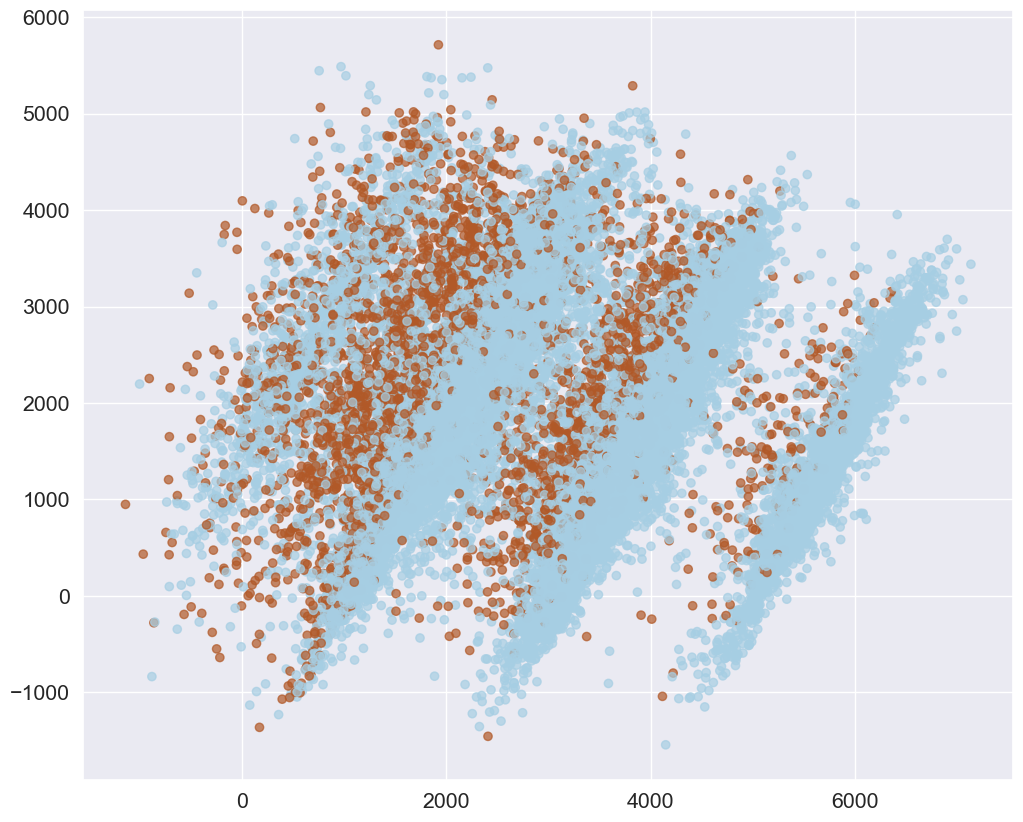

In [69]:
plt.figure(figsize=(12,10))
plt.scatter(X_nca_train[:,0],X_nca_train[:,1], c =y_train, alpha = 0.7, cmap ='Paired' ,); 

Достаточно много точек разбилось ровно по определенным областям, видно, что оранжевые точки смещены влево, а голубые находятся "под оранжевыми"

Визуализация "весов" преобразования

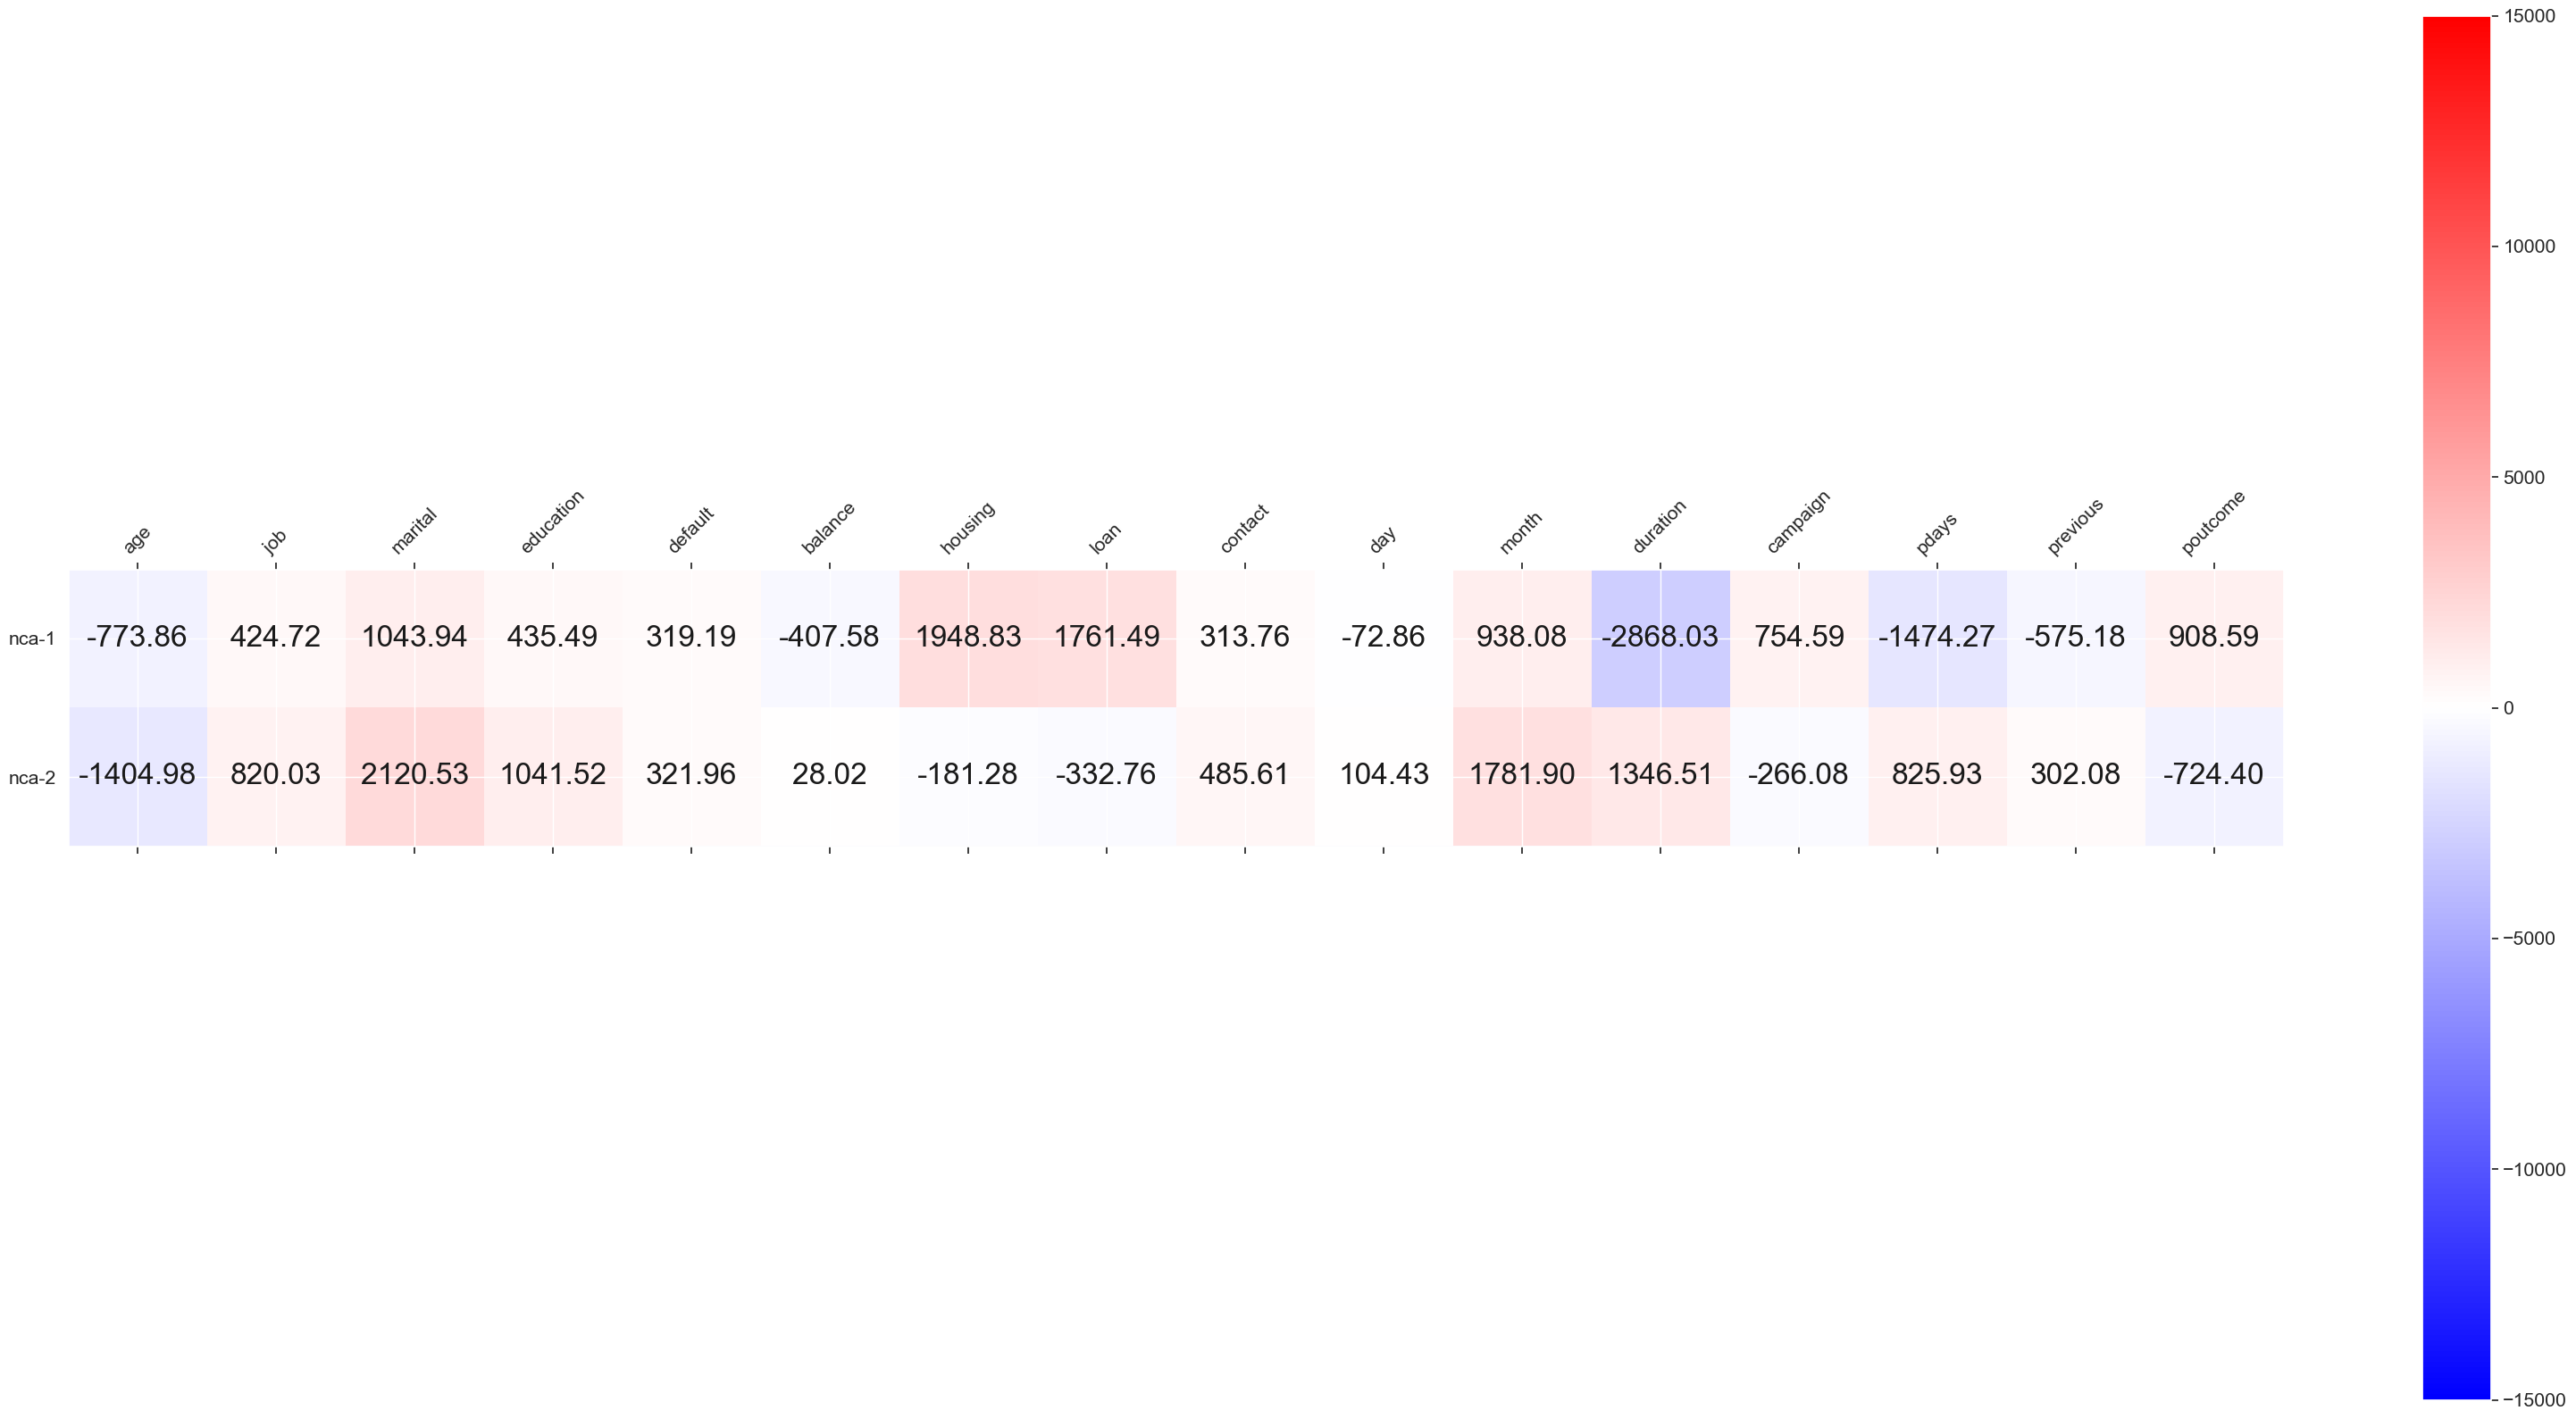

In [70]:
fig=plt.figure(figsize=(40,20))
W = nca.components_
nca_names = ['nca-'+str(x+1) for x in range(W.shape[0])]
plt.matshow(W.astype(float),cmap='bwr',vmin=-15000,vmax=15000, fignum=1)
for (i, j), z in np.ndenumerate(W):
    plt.text(j, i, '{:0.2f}'.format(z), ha='center', va='center', color = 'k', fontsize = 'x-large')
plt.xticks(np.arange(0, W.shape[1]), features_names,rotation = 45)
plt.yticks(np.arange(0, W.shape[0]),nca_names)
plt.colorbar();

Здесь видно, какие признаки являются наиболее значимыми - duration, pdays, housing, poutcome

Посмотрим на важные признаки с помощью метода feature_importances_ деревьев решений

In [101]:
from sklearn.tree import DecisionTreeClassifier
from matplotlib import plt
tree_clf = DecisionTreeClassifier(max_depth=3)

In [102]:
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [103]:
y_test_pred = tree_clf.predict(X_test)

In [104]:
importance = tree_clf.feature_importances_

In [117]:
for i,v in enumerate(importance):
    print('Feature-',df.columns[i], '-Score: %.5f' % (v))

Feature- age -Score: 0.05403
Feature- job -Score: 0.00000
Feature- marital -Score: 0.00000
Feature- education -Score: 0.00000
Feature- default -Score: 0.00000
Feature- balance -Score: 0.00000
Feature- housing -Score: 0.00000
Feature- loan -Score: 0.00000
Feature- contact -Score: 0.02942
Feature- day -Score: 0.00000
Feature- month -Score: 0.00000
Feature- duration -Score: 0.56822
Feature- campaign -Score: 0.00000
Feature- pdays -Score: 0.10891
Feature- previous -Score: 0.00000
Feature- poutcome -Score: 0.23942


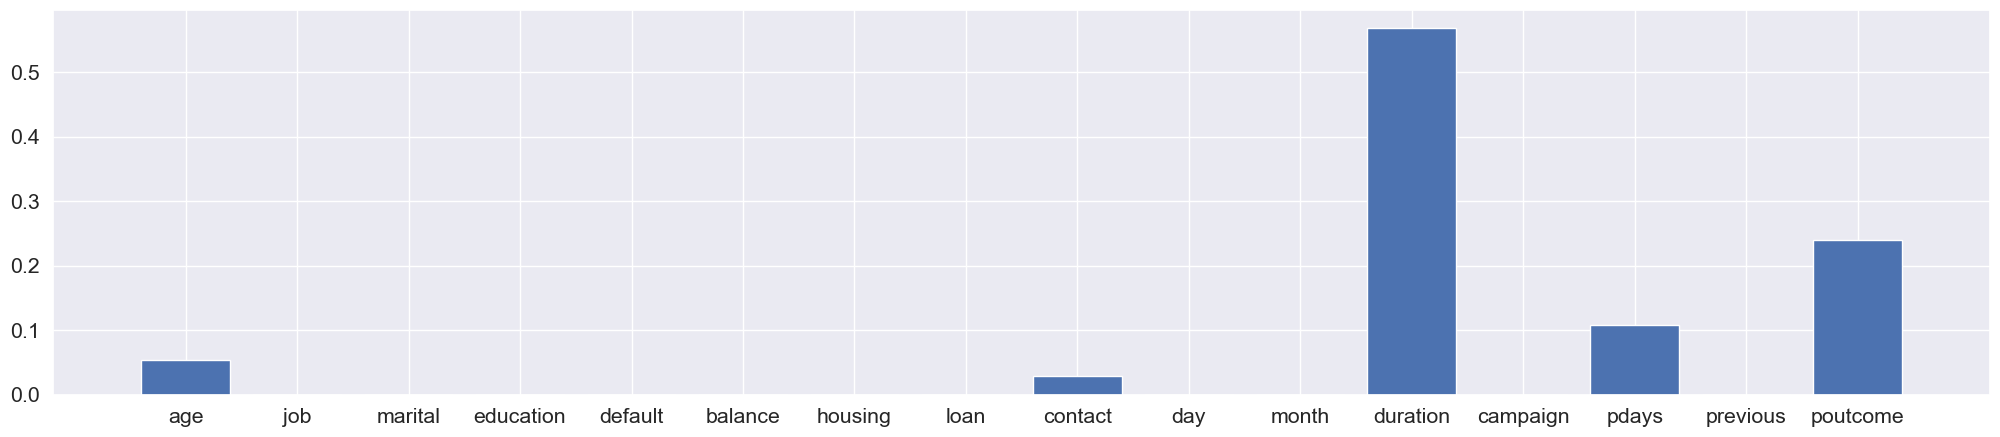

In [125]:
plt.figure(figsize=(25, 5))
plt.bar([x for x in df.columns],importance)
plt.show()

Здесь также видно, что наибольшее значение на тергет оказывают признаки - duration, poutcome,pdays,age

Рассмотрим для случая (3 компоненты)

In [71]:
nca = NeighborhoodComponentsAnalysis(n_components=3)
nca.fit(X_test,y_test)
X_nca3 = nca.transform(X_test)

Трансформируем оставшиеся данные

In [72]:
X_nca3_train = nca.transform(X_train)

Визуализируем новое пространство

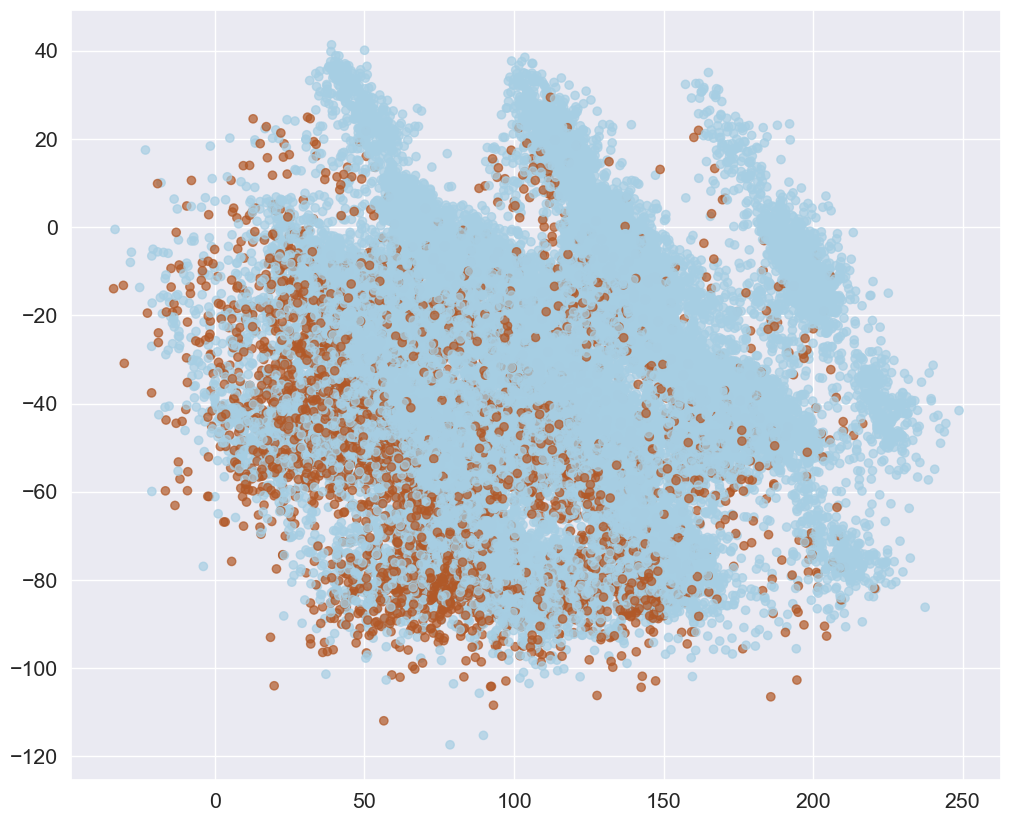

In [73]:
plt.figure(figsize=(12,10))
plt.scatter(X_nca3_train[:,0],X_nca3_train[:,2], c =y_train, alpha = 0.7, cmap ='Paired' ,); 

Кажется, что для случая 3 компонент произошло более четкое разделение, хотя ораньжевые точки также присутсвуют среди голубых

Визуализация "весов" преобразования

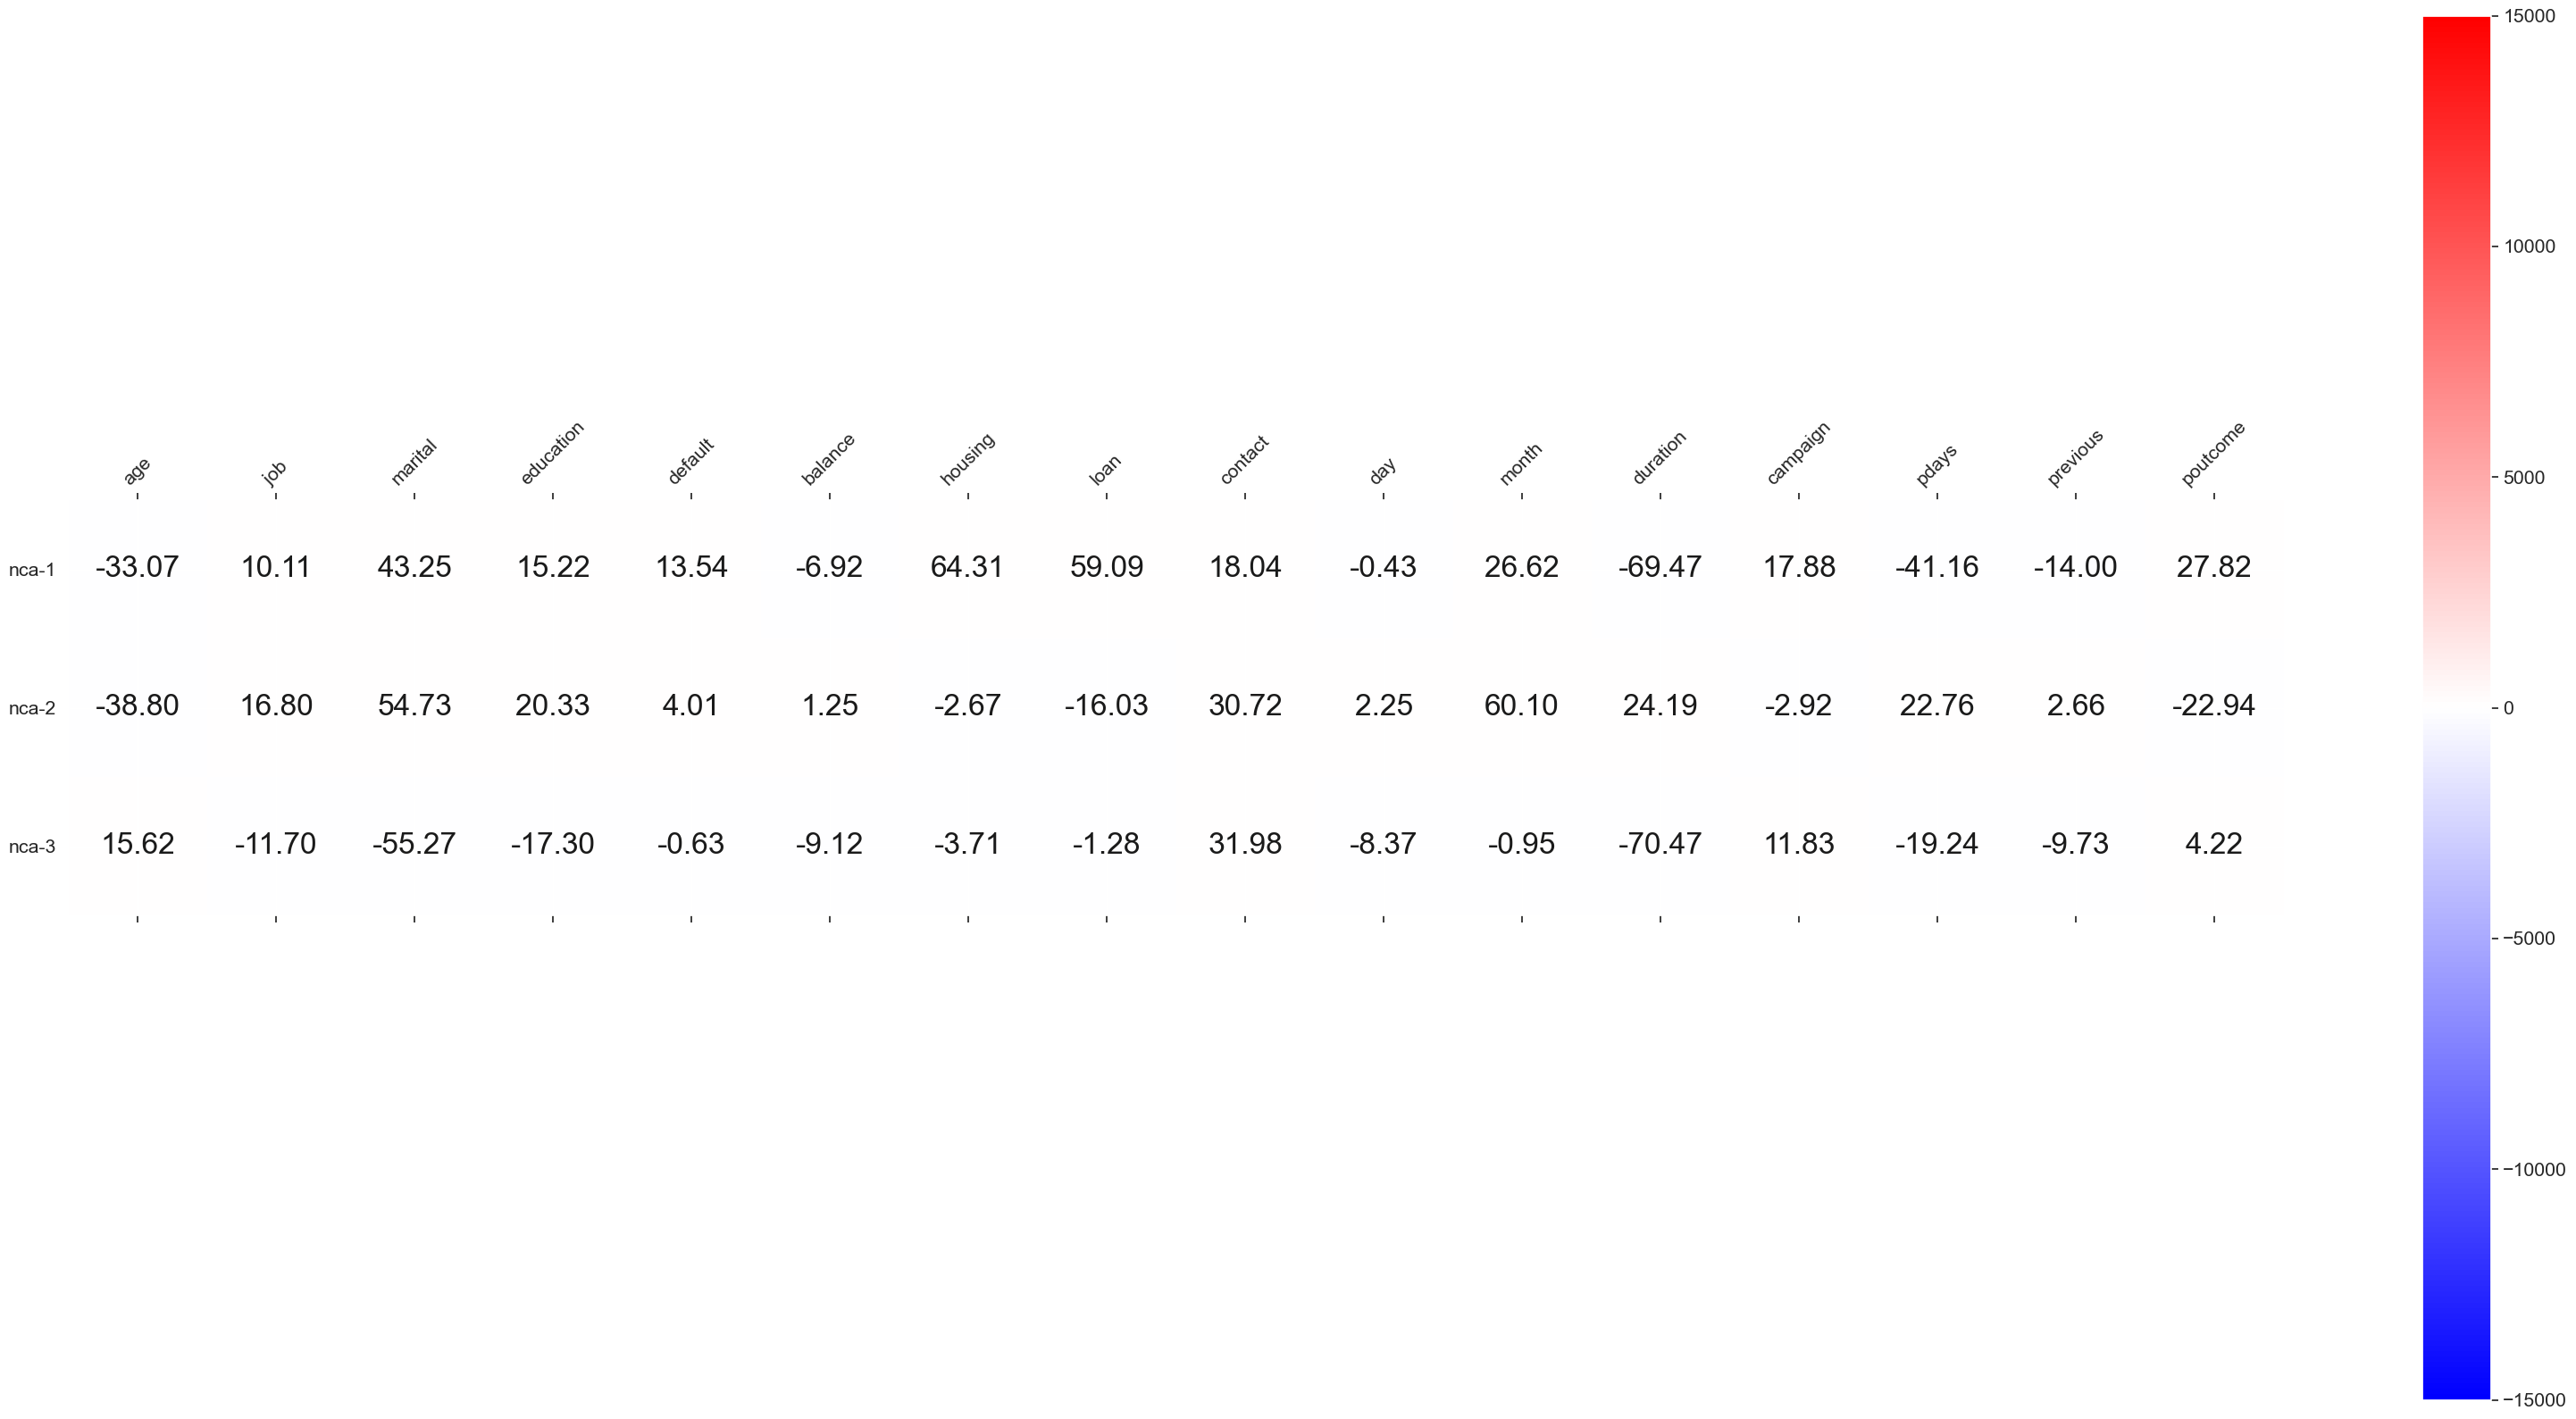

In [74]:
fig=plt.figure(figsize=(40,20))
W = nca.components_
nca_names = ['nca-'+str(x+1) for x in range(W.shape[0])]
plt.matshow(W.astype(float),cmap='bwr',vmin=-15000,vmax=15000, fignum=1)
for (i, j), z in np.ndenumerate(W):
    plt.text(j, i, '{:0.2f}'.format(z), ha='center', va='center', color = 'k', fontsize = 'x-large')
plt.xticks(np.arange(0, W.shape[1]), features_names,rotation = 45)
plt.yticks(np.arange(0, W.shape[0]),nca_names)
plt.colorbar();

#### Рассмотрим TSNE для визуализации разбиения точек

In [75]:
from sklearn.manifold import TSNE

Рассмотрим то значение perplexity, которое лучше всего подойдет для наших данных

In [76]:
n_iter = 350 
perplexity = 50 

tsne = TSNE(n_components=2, verbose=1, 
            perplexity=perplexity, n_iter=n_iter, )

tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 45201 samples in 0.002s...
[t-SNE] Computed neighbors for 45201 samples in 2.550s...
[t-SNE] Computed conditional probabilities for sample 1000 / 45201
[t-SNE] Computed conditional probabilities for sample 2000 / 45201
[t-SNE] Computed conditional probabilities for sample 3000 / 45201
[t-SNE] Computed conditional probabilities for sample 4000 / 45201
[t-SNE] Computed conditional probabilities for sample 5000 / 45201
[t-SNE] Computed conditional probabilities for sample 6000 / 45201
[t-SNE] Computed conditional probabilities for sample 7000 / 45201
[t-SNE] Computed conditional probabilities for sample 8000 / 45201
[t-SNE] Computed conditional probabilities for sample 9000 / 45201
[t-SNE] Computed conditional probabilities for sample 10000 / 45201
[t-SNE] Computed conditional probabilities for sample 11000 / 45201
[t-SNE] Computed conditional probabilities for sample 12000 / 45201
[t-SNE] Computed conditional probabilities for sa

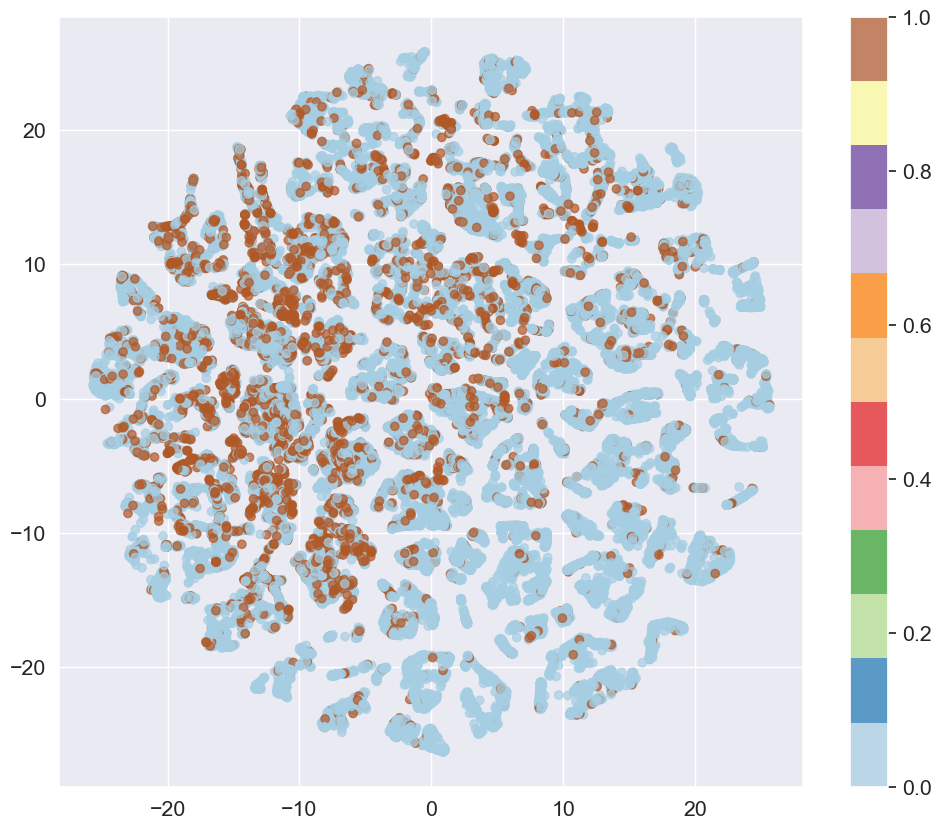

In [77]:
plt.figure(figsize=(12,10))
plt.scatter(tsne_results[:,0],tsne_results[:,1], c =y, alpha = 0.7, cmap ='Paired' ,)
plt.colorbar();

Видно, что голубые точки в большей мере расположены в нижней части графика

In [78]:
n_iter = 350 
perplexity = 5 

tsne = TSNE(n_components=2, verbose=1, 
            perplexity=perplexity, n_iter=n_iter, )

tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 45201 samples in 0.006s...
[t-SNE] Computed neighbors for 45201 samples in 1.802s...
[t-SNE] Computed conditional probabilities for sample 1000 / 45201
[t-SNE] Computed conditional probabilities for sample 2000 / 45201
[t-SNE] Computed conditional probabilities for sample 3000 / 45201
[t-SNE] Computed conditional probabilities for sample 4000 / 45201
[t-SNE] Computed conditional probabilities for sample 5000 / 45201
[t-SNE] Computed conditional probabilities for sample 6000 / 45201
[t-SNE] Computed conditional probabilities for sample 7000 / 45201
[t-SNE] Computed conditional probabilities for sample 8000 / 45201
[t-SNE] Computed conditional probabilities for sample 9000 / 45201
[t-SNE] Computed conditional probabilities for sample 10000 / 45201
[t-SNE] Computed conditional probabilities for sample 11000 / 45201
[t-SNE] Computed conditional probabilities for sample 12000 / 45201
[t-SNE] Computed conditional probabilities for sam

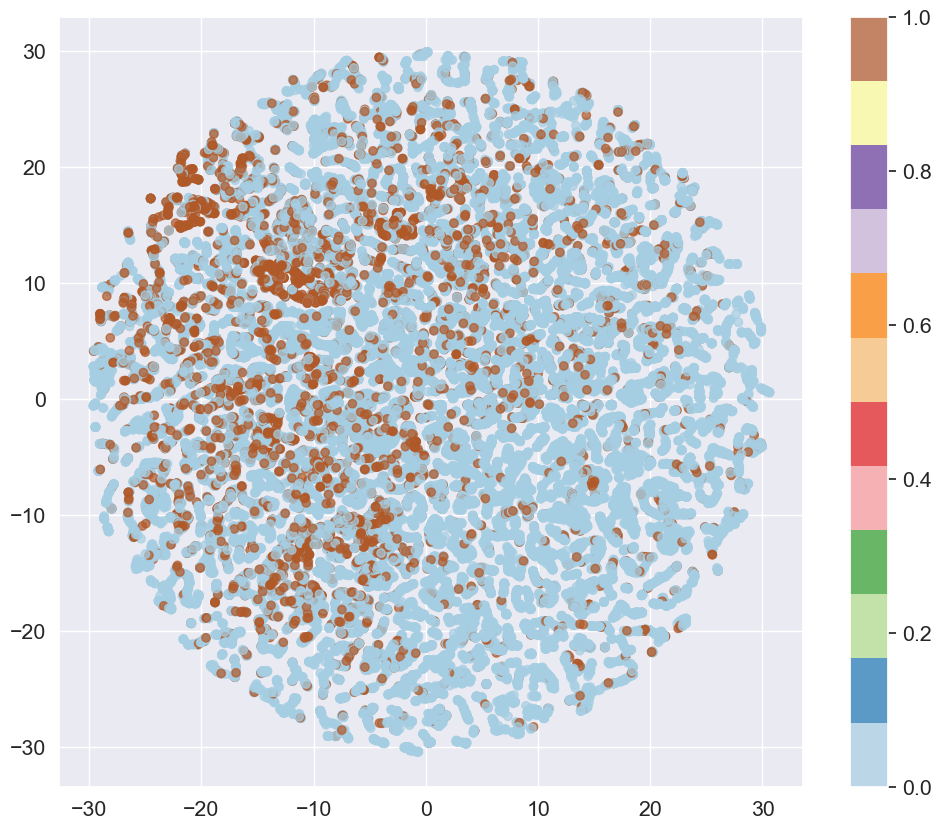

In [79]:
plt.figure(figsize=(12,10))
plt.scatter(tsne_results[:,0],tsne_results[:,1], c =y, alpha = 0.7, cmap ='Paired' ,)
plt.colorbar();

Для случая с параметром perplexity = 5 наблюдается более четкое разбиение точек

In [80]:
n_iter = 350 
perplexity = 10 

tsne = TSNE(n_components=2, verbose=1, 
            perplexity=perplexity, n_iter=n_iter, )

tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 45201 samples in 0.005s...
[t-SNE] Computed neighbors for 45201 samples in 1.819s...
[t-SNE] Computed conditional probabilities for sample 1000 / 45201
[t-SNE] Computed conditional probabilities for sample 2000 / 45201
[t-SNE] Computed conditional probabilities for sample 3000 / 45201
[t-SNE] Computed conditional probabilities for sample 4000 / 45201
[t-SNE] Computed conditional probabilities for sample 5000 / 45201
[t-SNE] Computed conditional probabilities for sample 6000 / 45201
[t-SNE] Computed conditional probabilities for sample 7000 / 45201
[t-SNE] Computed conditional probabilities for sample 8000 / 45201
[t-SNE] Computed conditional probabilities for sample 9000 / 45201
[t-SNE] Computed conditional probabilities for sample 10000 / 45201
[t-SNE] Computed conditional probabilities for sample 11000 / 45201
[t-SNE] Computed conditional probabilities for sample 12000 / 45201
[t-SNE] Computed conditional probabilities for sam

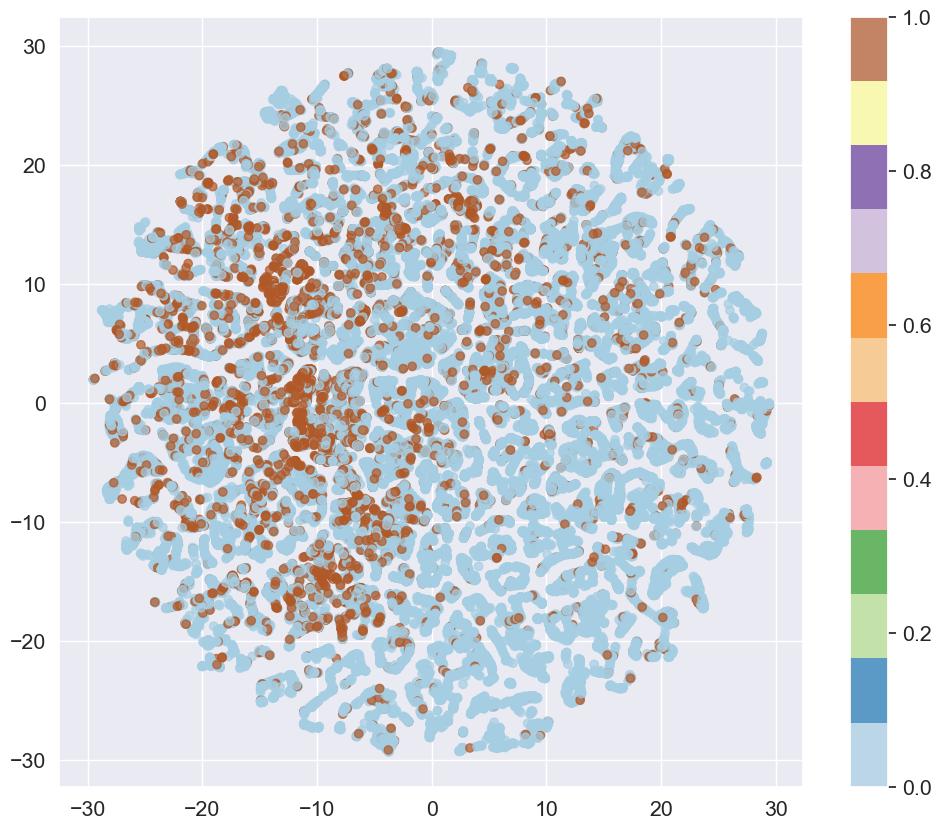

In [81]:
plt.figure(figsize=(12,10))
plt.scatter(tsne_results[:,0],tsne_results[:,1], c =y, alpha = 0.7, cmap ='Paired' ,)
plt.colorbar();

Также видно, неплохое разбиение точек

## Метод к-Ближайших Соседей

In [82]:
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import ShuffleSplit

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [83]:
from sklearn.neighbors import  KNeighborsClassifier

from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import f1_score as f1

#### Оценим работу алгоритма на всех данных

In [84]:
k = 9
weights = 'distance'

kNN = KNeighborsRegressor(n_neighbors=k, weights=weights )


kNN.fit(X_train, y_train)

y_predict=kNN.predict(X_test)

scoring = {'R2': 'r2',
           '-MSE': 'neg_mean_squared_error',
           '-MAE': 'neg_mean_absolute_error',
           'Max': 'max_error'}
           
scores = cross_validate(kNN, X_train, y_train,
                      scoring=scoring, cv=ShuffleSplit(n_splits=5, random_state=42))


print('Результаты Кросс-валидации')
DF_cv_kNN = pd.DataFrame(scores)
display(DF_cv_kNN)
print('\n')
print(DF_cv_kNN.mean()[2:])

print('Ошибка на тестовых данных')
print('MSE: %.1f' % mse(y_test,y_predict))
print('RMSE: %.1f' % mse(y_test,y_predict,squared=False))

print('R2 : %.4f' %  r2_score(y_test,y_predict))

Результаты Кросс-валидации


fit_time  score_time   test_R2  test_-MSE  test_-MAE  test_Max
0  0.007183    0.201046  0.212557  -0.076867  -0.130715      -1.0
1  0.008150    0.179419  0.186732  -0.083873  -0.136785      -1.0
2  0.007717    0.189748  0.174697  -0.085891  -0.138982      -1.0
3  0.007635    0.202885  0.159839  -0.087279  -0.140995      -1.0
4  0.013235    0.199034  0.170528  -0.085544  -0.138379      -1.0



test_R2      0.180870
test_-MSE   -0.083891
test_-MAE   -0.137171
test_Max    -1.000000
dtype: float64
Ошибка на тестовых данных
MSE: 0.1
RMSE: 0.3
R2 : 0.2165


#### Гиперпараметры к-Ближайших Соседей

In [85]:
from sklearn.model_selection import GridSearchCV

In [86]:
parameters = {'n_neighbors':np.arange(1,30,4), 
              'weights':['uniform', 'distance']}

kNN_search = GridSearchCV(estimator = KNeighborsClassifier(),verbose = 3,
                          param_grid=parameters ,cv=StratifiedKFold(n_splits=5))

kNN_search.fit(X_train, y_train)

kNNbest=kNN_search.best_estimator_

kNNbest.fit(X_train, y_train);

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ....n_neighbors=1, weights=uniform;, score=0.868 total time=   0.4s
[CV 2/5] END ....n_neighbors=1, weights=uniform;, score=0.870 total time=   0.4s
[CV 3/5] END ....n_neighbors=1, weights=uniform;, score=0.871 total time=   0.4s
[CV 4/5] END ....n_neighbors=1, weights=uniform;, score=0.873 total time=   0.4s
[CV 5/5] END ....n_neighbors=1, weights=uniform;, score=0.871 total time=   0.4s
[CV 1/5] END ...n_neighbors=1, weights=distance;, score=0.868 total time=   0.2s
[CV 2/5] END ...n_neighbors=1, weights=distance;, score=0.870 total time=   0.2s
[CV 3/5] END ...n_neighbors=1, weights=distance;, score=0.871 total time=   0.1s
[CV 4/5] END ...n_neighbors=1, weights=distance;, score=0.873 total time=   0.2s
[CV 5/5] END ...n_neighbors=1, weights=distance;, score=0.871 total time=   0.2s
[CV 1/5] END ....n_neighbors=5, weights=uniform;, score=0.889 total time=   0.4s
[CV 2/5] END ....n_neighbors=5, weights=uniform;

Лучшие параметры

In [87]:
kNN_search.best_estimator_

KNeighborsClassifier(n_neighbors=17, weights='distance')

Оценим лучшего кандидата при кросс-валидации и на тестовых данных

In [88]:
scoring = {'ACC': 'accuracy',
           'F1': 'f1',
           'Precision': 'precision',
           'Recall': 'recall'}

scores = cross_validate(kNNbest, X_train, y_train,
                      scoring=scoring, cv=StratifiedKFold(n_splits=5, shuffle = True, random_state=42))


print('Cross-Validation error')
DF_cv_best_kNN = pd.DataFrame(scores)
display(DF_cv_best_kNN)
print('\n')
print(DF_cv_best_kNN.mean()[2:])

Cross-Validation error


fit_time  score_time  test_ACC   test_F1  test_Precision  test_Recall
0  0.006304    0.428651  0.889258  0.242220        0.595041     0.152059
1  0.005983    0.363605  0.891593  0.272277        0.625000     0.174051
2  0.006530    0.406784  0.891593  0.250000        0.644737     0.155063
3  0.005989    0.381085  0.893314  0.261905        0.675439     0.162447
4  0.006429    0.328808  0.893068  0.256410        0.675676     0.158228



test_ACC          0.891765
test_F1           0.256563
test_Precision    0.643178
test_Recall       0.160370
dtype: float64


Сделаем classification_report для наглядности

In [89]:
y_predict=kNNbest.predict(X_test)

print (classification_report(y_test, y_predict, target_names=['no','yes']))

              precision    recall  f1-score   support

          no       0.90      0.98      0.94      3978
         yes       0.61      0.18      0.28       543

    accuracy                           0.89      4521
   macro avg       0.75      0.58      0.61      4521
weighted avg       0.86      0.89      0.86      4521



Из полученных данных видно, что f1 для метки yes достаточно низкий, и очень низкий recall. accuracy имеет достаточно высокое значение, но ее правильнее применять к сбалансированным классам. В нашем случае видно, что признак несбалансирован, меток yes очень мало по сравнению с no, скорее всего, за счет недостка этих данных, алгоритм часто ошибочно классифицирует yes, как no

Рассмотрим отчет по результатам работы GridSearchCV

In [90]:
DF_class=pd.DataFrame(kNN_search.cv_results_)
DF = DF_class[['param_n_neighbors','param_weights',
               'mean_test_score', 'std_test_score', 'rank_test_score']]
cm = sns.light_palette("blue", as_cmap=True)
hl = DF.sort_values(by = 'rank_test_score').style.background_gradient(cmap=cm)
hl

Доля правильных ответов составляет 0.89

### Применяем к данным после уменьшения размерности

#### Для случая n_components = 2

In [91]:
kNN = KNeighborsClassifier(n_neighbors=17,weights='distance' )

kNN.fit(X_nca_train, y_train)

scoring = {'ACC': 'accuracy',
           'F1': 'f1',
           'Precision': 'precision',
           'Recall': 'recall'}

scores = cross_validate(kNN, X_nca_train, y_train,scoring=scoring, cv=StratifiedKFold(n_splits=5))

y_predict=kNN.predict(X_nca)


print('Cross-Validation error')


DF_nca=pd.DataFrame(scores)
DF_nca.columns = [name+'_nca' for name in DF_nca.columns]


display(DF_nca)
print('\n')
print(DF_nca.mean())
print('\n')


Cross-Validation error


fit_time_nca  score_time_nca  test_ACC_nca  test_F1_nca  \
0      0.047521        0.083564      0.883235     0.348422   
1      0.020998        0.041034      0.883112     0.334500   
2      0.021282        0.048639      0.882375     0.352941   
3      0.020872        0.040812      0.880039     0.326897   
4      0.029480        0.064659      0.885324     0.352533   

   test_Precision_nca  test_Recall_nca  
0            0.497065         0.268215  
1            0.496881         0.252110  
2            0.491525         0.275316  
3            0.472112         0.250000  
4            0.515213         0.267932



fit_time_nca          0.028031
score_time_nca        0.055742
test_ACC_nca          0.882817
test_F1_nca           0.343059
test_Precision_nca    0.494559
test_Recall_nca       0.262715
dtype: float64




Рассмотрим насколько хорошо были класстеризованы точки

In [92]:
y_predict=kNN.predict(X_nca)

print (classification_report(y_test, y_predict, target_names=['no','yes']))

              precision    recall  f1-score   support

          no       0.91      0.96      0.93      3978
         yes       0.49      0.28      0.36       543

    accuracy                           0.88      4521
   macro avg       0.70      0.62      0.64      4521
weighted avg       0.86      0.88      0.86      4521



Видно, что для no - f1 имеет высокое значение, а для yes- низкое / скорее всего это связанно с несбалансированностью класса, Accuracy имеет довольно высокое значение, но она не отражает реального качества работы алгоритма, поскольку применяется для сбалансированных классов.

Также рассмотрим сколько точек были класстеризованы верно и неверно

In [93]:
pd.crosstab(y_test, y_predict)

col_0     0    1
row_0           
0      3823  155
1       392  151

Видно, что алгоритм часто ошибается при прогнозировании -1(yes) / поскольку наблюдается несбалансированность классов, в целом в данных очень мало меток 1(yes)

#### Для случая n_components = 3

In [94]:
kNN = KNeighborsClassifier(n_neighbors=17,weights='distance' )

kNN.fit(X_nca3_train, y_train)

scoring = {'ACC': 'accuracy',
           'F1': 'f1',
           'Precision': 'precision',
           'Recall': 'recall'}

scores = cross_validate(kNN, X_nca3_train, y_train,scoring=scoring, cv=StratifiedKFold(n_splits=5))

y_predict=kNN.predict(X_nca3)


print('Cross-Validation error')


DF_nca3=pd.DataFrame(scores)
DF_nca3.columns = [name+'_nca' for name in DF_nca3.columns]


display(DF_nca3)
print('\n')
print(DF_nca3.mean())
print('\n')


Cross-Validation error


fit_time_nca  score_time_nca  test_ACC_nca  test_F1_nca  \
0      0.032866        0.090038      0.891101     0.360750   
1      0.056630        0.080378      0.888889     0.349640   
2      0.030418        0.089329      0.886922     0.335260   
3      0.028386        0.116211      0.888397     0.345821   
4      0.040508        0.065834      0.891593     0.350515   

   test_Precision_nca  test_Recall_nca  
0            0.569476         0.263992  
1            0.549774         0.256329  
2            0.532110         0.244726  
3            0.545455         0.253165  
4            0.580488         0.251055



fit_time_nca          0.037762
score_time_nca        0.088358
test_ACC_nca          0.889381
test_F1_nca           0.348398
test_Precision_nca    0.555460
test_Recall_nca       0.253853
dtype: float64




Рассмотрим насколько хорошо были класстеризованы точки

In [95]:
y_predict=kNN.predict(X_nca3)

print (classification_report(y_test, y_predict, target_names=['no','yes']))

              precision    recall  f1-score   support

          no       0.91      0.97      0.94      3978
         yes       0.54      0.28      0.37       543

    accuracy                           0.89      4521
   macro avg       0.73      0.62      0.65      4521
weighted avg       0.86      0.89      0.87      4521



Для случая 3 компонент f1 немного увеличился, для класса yes - незначительно

Также рассмотрим сколько точек были класстеризованы верно и неверно

In [96]:
pd.crosstab(y_test, y_predict)

col_0     0    1
row_0           
0      3852  126
1       393  150

Результаты для 3 компонент немного лучше, чем для случая 2 компонент

### Сравним результаты класстеризации для разных данных

In [97]:
df1 = pd.DataFrame(
                {
                    'KNN':  DF_cv_best_kNN.mean().values,
                    'KNN_nca_2comp': DF_nca.mean().values,
                    'KNN_nca_3comp': DF_nca3.mean().values
                })
df1.index = DF_cv_best_kNN.mean().index

In [98]:
df1

KNN  KNN_nca_2comp  KNN_nca_3comp
fit_time        0.006247       0.028031       0.037762
score_time      0.381787       0.055742       0.088358
test_ACC        0.891765       0.882817       0.889381
test_F1         0.256563       0.343059       0.348398
test_Precision  0.643178       0.494559       0.555460
test_Recall     0.160370       0.262715       0.253853

Видно, что при класстеризации данных после уменьшения размерности, результаты в среднем улучшились (если смотреть на F1). Для случая 3 главных компонент рузультаты улучшились, но незначительно. Это связано с тем, что при уменьшении размерности мы учитываем только наиболее важные признаки, и откидываем те, которые не вносят важной информации и могут только ухудшить результаты